<a href="https://colab.research.google.com/github/hosngholami/RecommenderSystem/blob/main/RecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install opendatasets
!pip install geopy
!pip install folium
!pip install -U pymoo
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.4 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=2ee2635a068b4e87d5d15702a6fc721da694c2d0cb93c0ac304fd12f337c4cbd
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d884698674138632a83fdfad4926
Successfully built grapheme


In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
np.set_printoptions(suppress=True)
pd.set_option("display.max_columns", 1000)
pd.set_option('display.max_rows', 1000)
np.set_printoptions(threshold=np.inf)

In [5]:
import random
import matplotlib.pyplot as plt
locations = pd.read_csv('/content/drive/MyDrive/Shiraz/locations.csv')
locations["Id"] = [i for i in range(0, len(locations))]
locations["Stars"] = 0
locations["Price"] = 0
# locations["Price"] = [random.randint(10, 200) for i in range(len(locations))]

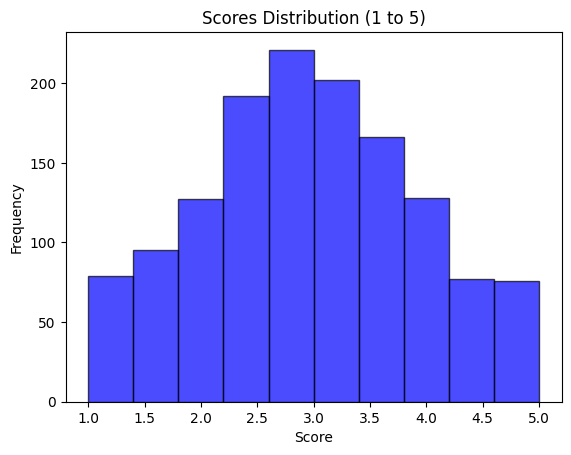

In [6]:
mean_score = 3  # میانگین امتیاز (در وسط بازه 1 تا 5)
std_dev = 1     # انحراف معیار امتیاز

# تعداد آیتم‌ها
num_items = len(locations)

# تولید امتیازات خام با توزیع نرمال
raw_scores = np.random.normal(mean_score, std_dev, num_items)
scores = np.clip(raw_scores, 1, 5)
data = pd.DataFrame({'Item': [f'Item_{i+1}' for i in range(num_items)], 'Score': scores})

# مرتب‌سازی بر اساس امتیاز و اختصاص رتبه
data = data.sort_values(by='Score', ascending=False).reset_index(drop=True)
data['Rank'] = data.index + 1

# رسم هیستوگرام امتیازات
plt.hist(scores, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Scores Distribution (1 to 5)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

locations["Stars"] = scores

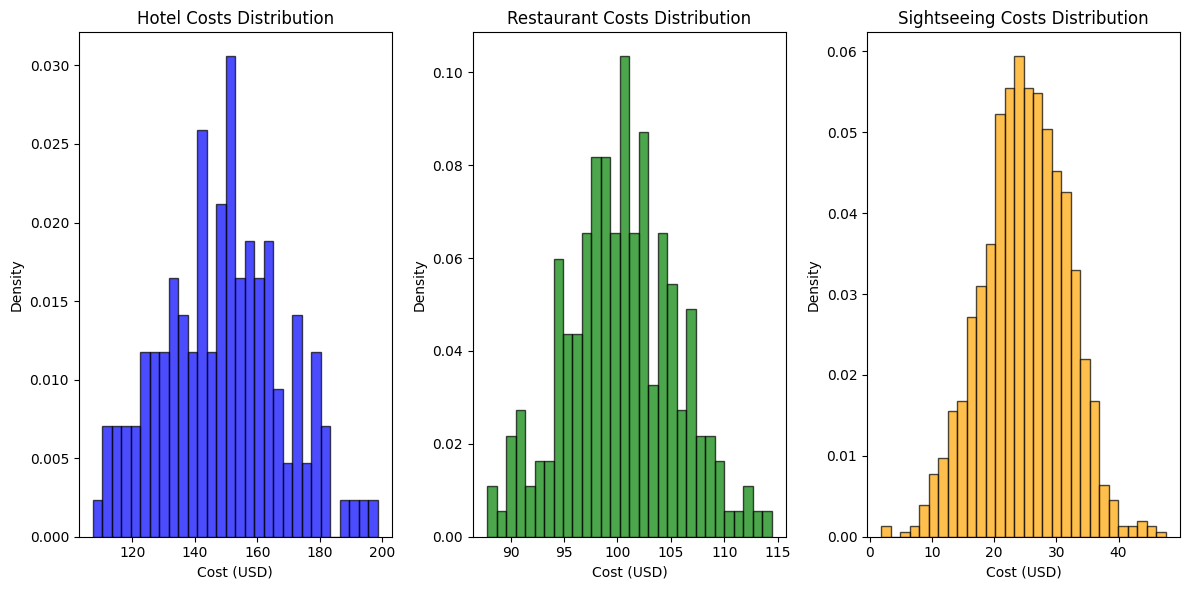

In [7]:
import numpy as np


# تعداد مکان‌ها
num_hotels = len(locations[locations["type"] == "hotel"])         # تعداد هتل‌ها
num_restaurants = len(locations[locations["type"] == "restaurant"])    # تعداد رستوران‌ها
num_sightseeing = len(locations[~locations["type"].isin(['hotel', 'restaurant'])])    # تعداد مکان‌های دیدنی

# پارامترهای توزیع نرمال برای هزینه‌های واحد
# هزینه هتل
mean_hotel = 150  # میانگین هزینه هر هتل (دلار)
std_hotel = 20    # انحراف معیار هزینه هر هتل

# هزینه رستوران
mean_restaurant = 100  # میانگین هزینه هر رستوران (دلار)
std_restaurant = 5    # انحراف معیار هزینه هر رستوران

# هزینه مکان‌های دیدنی
mean_sightseeing = 25  # میانگین هزینه هر مکان دیدنی (دلار)
std_sightseeing = 7     # انحراف معیار هزینه هر مکان دیدنی

# تولید هزینه‌ها برای هر بخش
hotel_costs = np.random.normal(mean_hotel, std_hotel, num_hotels)
restaurant_costs = np.random.normal(mean_restaurant, std_restaurant, num_restaurants)
sightseeing_costs = np.random.normal(mean_sightseeing, std_sightseeing, num_sightseeing)

# رسم نمودار توزیع نرمال برای هر بخش
plt.figure(figsize=(12, 6))

# نمودار هتل‌ها
plt.subplot(1, 3, 1)
plt.hist(hotel_costs, bins=30, color='blue', alpha=0.7, edgecolor='black', density=True)
plt.title('Hotel Costs Distribution')
plt.xlabel('Cost (USD)')
plt.ylabel('Density')

# نمودار رستوران‌ها
plt.subplot(1, 3, 2)
plt.hist(restaurant_costs, bins=30, color='green', alpha=0.7, edgecolor='black', density=True)
plt.title('Restaurant Costs Distribution')
plt.xlabel('Cost (USD)')
plt.ylabel('Density')

# نمودار مکان‌های دیدنی
plt.subplot(1, 3, 3)
plt.hist(sightseeing_costs, bins=30, color='orange', alpha=0.7, edgecolor='black', density=True)
plt.title('Sightseeing Costs Distribution')
plt.xlabel('Cost (USD)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



indexHotel = locations[locations["type"] == "hotel"].index

for i in indexHotel:
   locations.loc[i, "Price"] = int(hotel_costs[i])

indexRestaurant = locations[locations["type"] == "restaurant"].index

c = 0
for i in indexRestaurant:
   locations.loc[i, "Price"] = restaurant_costs[c]
   c += 1


c = 0
indexSightseeing = locations[~locations["type"].isin(['hotel', 'restaurant'])].index
for i in indexSightseeing:
   locations.loc[i, "Price"] = sightseeing_costs[c]
   c +=1



In [ ]:
set(locations["type"])

{'caffe',
 'historic',
 'hotel',
 'museum',
 'park',
 'placeofworship',
 'restaurant',
 'swimmingpool'}

In [8]:
def getLocation():
   location = locations[locations["type"] != "hotel"].sample(n=1)
   return location["Id"].values[0]

In [9]:
class GeneticAlgorithmConfig():
  totalLocationSize = 1
  hotelSize = 1
  numberLocationSize = len(locations[locations["type"] != "hotel"])
  totalRouteSize = 30
  timePlaceMappingSize = 2
  n_var = ((numberLocationSize * timePlaceMappingSize) +
         (hotelSize * timePlaceMappingSize) +
         (totalLocationSize))
  maxDistance = -1
  maxCost = -1
  maxRate = -1
  pareto_generations = []
  number_genrations = 0
  preference = {}
  best = []
  cost_variance = []
  distance_variance = []
  rate_variance = []
  distance_diversity = []
  cost_diversity = []
  rate_diversity = []
  GD = []
  HV = []
  firstFront = []
  ref_points = 0
  cd = []
  mpd_decision = []
  mpd_objective = []



In [10]:
def getSliceRoute(route):
  length = route[0] * GeneticAlgorithmConfig.timePlaceMappingSize
  startHead = GeneticAlgorithmConfig.hotelSize
  endHead = (GeneticAlgorithmConfig.hotelSize * GeneticAlgorithmConfig.timePlaceMappingSize) + GeneticAlgorithmConfig.totalLocationSize

  startTail = length + endHead
  endTail  = length + endHead + GeneticAlgorithmConfig.timePlaceMappingSize
  interior = []
  if(route[0] != 0):
      interior = route[endHead:startTail]

  return (route[startHead:endHead], interior, route[startTail:endTail])

In [11]:
userPreference = {"Historical": 0.01,
                  "Recreational": 0.01,
                  "Natural": 0.01,
                  "Adventure": 0.01,
                  "Religious": 0.01,
                  "Resort": 0.01,
                  "Artistic": 0.01,
                  "Photography": 0.01,
                  "Cultural": 5}

In [12]:
locations["tag"] = [[] for _ in range(len(locations))]

In [13]:
preference = userPreference.keys()
prefernce = list(preference)
prefernce = [key for key in preference if key != 'Resort']




index = locations[locations["type"] != "hotel"].index


for i in index:
  countRandom = np.random.randint(0, len(prefernce))
  if(countRandom == 0):
    countRandom = 1
  for _ in range(countRandom):
    rand = np.random.randint(0, len(prefernce))
    if(rand == 0):
      tag = prefernce[2]
      if(tag not in locations.iloc[i]["tag"]):
        locations.iloc[i]["tag"].append(tag)
    else:
      for _ in range(0, rand):
        tag = prefernce[rand]
        if(tag not in locations.iloc[i]["tag"]):
          locations.iloc[i]["tag"].append(tag)

# locations

In [14]:
index = locations[locations["type"] == "hotel"].index
for i in index:
  if('Resort' not in locations.iloc[i]["tag"]):
    locations.iloc[i]["tag"].append('Resort')
locations

Unnamed: 0           name            name:en  \
0              0        هتل هما         Homa Hotel   
1              1          ITTIC                NaN   
2              2   هتل جهانگردی                NaN   
3              3  هتل آریو برزن  Aryo Barzan Hotel   
4              4    هتل کریمخان   Karim Khan Hotel   
...          ...            ...                ...   
1358        1358      کافه قرار        Gharar Café   
1359        1359    کافه سه کنج      Seh Konj Cafe   
1360        1360   کافه پدربزرگ   Pedarbozorg Cafe   
1361        1361       کافهtohi                NaN   
1362        1362     Nayeb Cafe                NaN   

                                                   tag   type   Latitude  \
0                                             [Resort]  hotel  52.542056   
1                                             [Resort]  hotel  52.572353   
2                                             [Resort]  hotel  52.572018   
3                                             [Resort]  hotel  52.541213   
4                                             [Resort]  hotel  52.541173   
...                                                ...    ...        ...   
1358                                     [Photography]  caffe  52.479574   
1359      [Natural, Recreational, Religious, Artistic]  caffe  52.537592   
1360  [Photography, Cultural, Religious, Recreational]  caffe  52.506764   
1361                               [Natural, Cultural]  caffe  52.569189   
1362                                         [Natural]  caffe  52.498122   

      Longitude    Id     Stars       Price  
0     29.627516     0  1.075675  165.000000  
1     29.611979     1  3.427385  166.000000  
2     29.611642     2  3.648576  123.000000  
3     29.622286     3  1.591019  159.000000  
4     29.622023     4  2.020583  160.000000  
...         ...   ...       ...         ...  
1358  29.571434  1358  3.500061   32.312124  
1359  29.616573  1359  2.126721   31.238014  
1360  29.581426  1360  2.646544   21.486483  
1361  29.591688  1361  3.354145   35.143974  
1362  29.627743  1362  3.272372   30.426265  

[1363 rows x 10 columns]

In [15]:
def meanPairwiseDistance(population):

  distances = 0

  for i in range(len(population)):
    for j in range(len(population)):
      if( i != j):
        a = population[i]
        b = population[j]



        len_a = len(a)
        len_b = len(b)

        maxLength = max(len(a), len(b))

        a = np.pad(a, (0, maxLength - len_a), mode='constant', constant_values=0)
        b = np.pad(b, (0, maxLength - len_b), mode='constant', constant_values=0)

        distances += np.linalg.norm(a - b)

  return distances



n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      499 |     11 |             - |             -
len front_points: [[0.017782 0.041889 0.004084]
 [0.127077 0.156441 0.      ]
 [0.018123 0.021962 0.000053]
 [0.       1.611505 0.15533 ]
 [0.020642 0.030972 0.000038]
 [0.020657 0.020707 0.000088]
 [0.036632 0.05455  0.000033]
 [0.010287 0.059269 0.000155]
 [0.       2.139868 0.144526]
 [0.015455 0.057307 0.000076]
 [0.096764 0.187175 0.      ]]


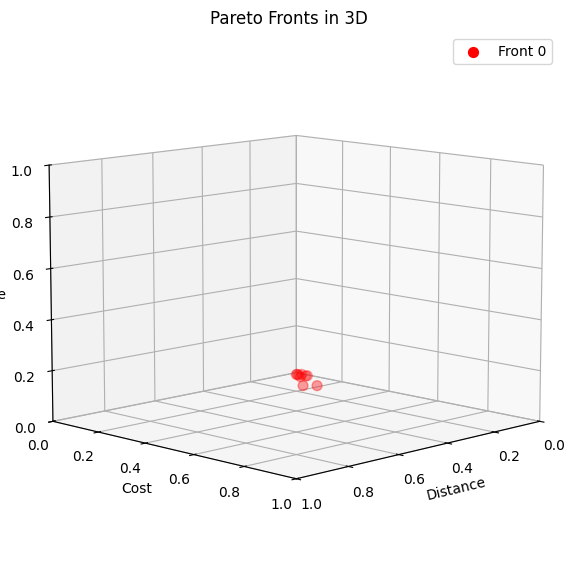

     2 |      999 |     14 |  0.5516630613 |         nadir
len front_points: [[0.127077 0.156441 0.      ]
 [0.020657 0.020707 0.000088]
 [0.096764 0.187175 0.      ]
 [0.007303 0.022796 0.000049]
 [0.00419  0.039791 0.000014]
 [0.008252 0.02503  0.000046]
 [0.191445 0.146205 0.      ]
 [0.013277 0.022115 0.000016]
 [0.00871  0.02782  0.000035]
 [0.021131 0.028475 0.000015]
 [0.012523 0.02191  0.000047]
 [0.       1.385514 0.130665]
 [0.032295 0.018096 0.000023]
 [0.222984 0.145233 0.      ]]


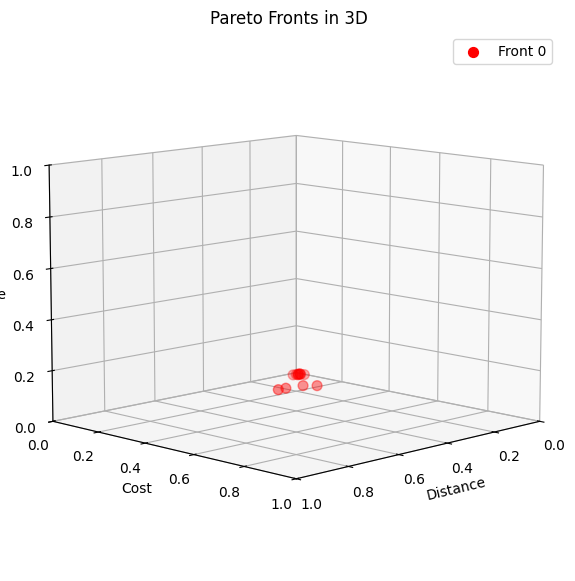

     3 |     1499 |     12 |  0.4513101537 |         nadir
len front_points: [[0.007303 0.022796 0.000049]
 [0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.158433 0.126849 0.      ]
 [0.05501  0.135833 0.      ]
 [0.069436 0.133861 0.      ]
 [0.       1.351444 0.23814 ]
 [0.008642 0.031376 0.000014]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]]


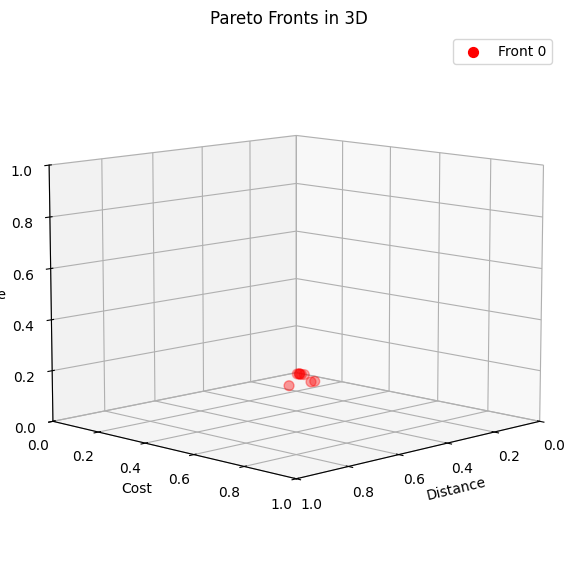

     4 |     1999 |     20 |  0.1523250028 |         nadir
len front_points: [[0.007303 0.022796 0.000049]
 [0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.158433 0.126849 0.      ]
 [0.05501  0.135833 0.      ]
 [0.069436 0.133861 0.      ]
 [0.008642 0.031376 0.000014]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.005389 0.029207 0.00209 ]
 [0.0525   0.187189 0.      ]
 [0.005123 0.024619 0.002729]
 [0.186903 0.115944 0.      ]
 [0.       1.249234 0.212703]
 [0.02105  0.016911 0.000028]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.006883 0.032812 0.000023]]


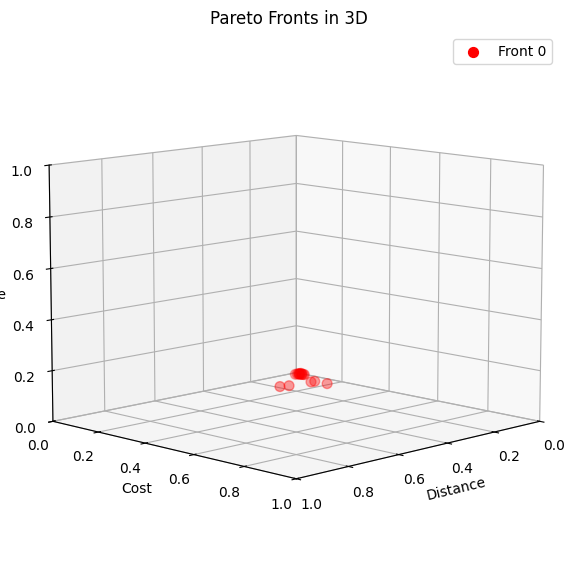

     5 |     2499 |     23 |  0.9985564431 |         nadir
len front_points: [[0.007303 0.022796 0.000049]
 [0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.05501  0.135833 0.      ]
 [0.069436 0.133861 0.      ]
 [0.008642 0.031376 0.000014]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.005123 0.024619 0.002729]
 [0.       1.249234 0.212703]
 [0.02105  0.016911 0.000028]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.006883 0.032812 0.000023]
 [0.049961 0.18411  0.      ]
 [0.007652 0.023012 0.00002 ]
 [0.005141 0.020431 0.000057]
 [0.008807 0.018499 0.000057]
 [0.008115 0.033068 0.000015]
 [0.093519 0.1106   0.      ]
 [0.024768 0.017327 0.000012]]


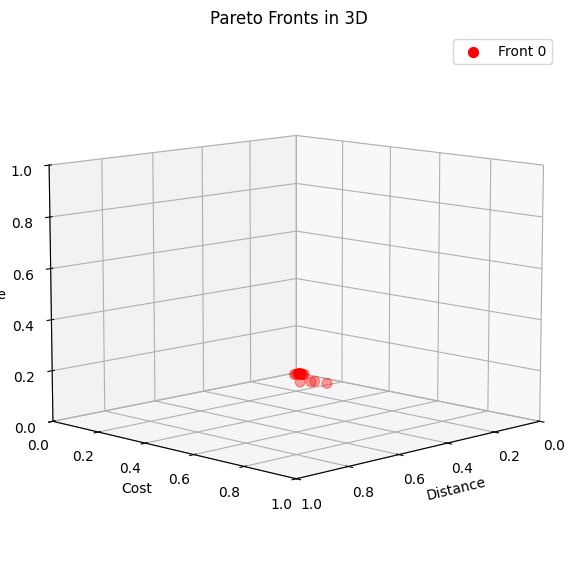

     6 |     2999 |     25 |  0.0154809450 |             f
len front_points: [[0.007303 0.022796 0.000049]
 [0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.005123 0.024619 0.002729]
 [0.       1.249234 0.212703]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.007652 0.023012 0.00002 ]
 [0.005141 0.020431 0.000057]
 [0.008807 0.018499 0.000057]
 [0.093519 0.1106   0.      ]
 [0.024768 0.017327 0.000012]
 [0.018781 0.016911 0.000028]
 [0.005913 0.028976 0.000014]
 [0.007161 0.024161 0.00002 ]
 [0.043515 0.159574 0.      ]
 [0.014334 0.016768 0.00008 ]
 [0.054217 0.119745 0.      ]
 [0.029618 0.240751 0.      ]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]]


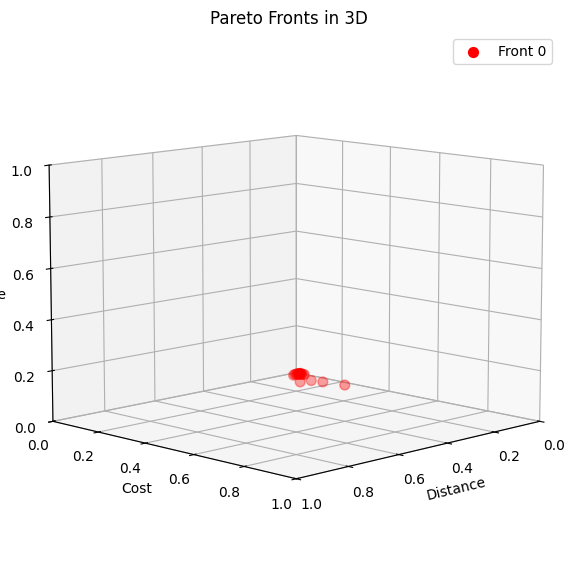

     7 |     3499 |     31 |  0.8619268521 |         nadir
len front_points: [[0.007303 0.022796 0.000049]
 [0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.005123 0.024619 0.002729]
 [0.       1.249234 0.212703]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.007652 0.023012 0.00002 ]
 [0.005141 0.020431 0.000057]
 [0.008807 0.018499 0.000057]
 [0.024768 0.017327 0.000012]
 [0.018781 0.016911 0.000028]
 [0.005913 0.028976 0.000014]
 [0.007161 0.024161 0.00002 ]
 [0.043515 0.159574 0.      ]
 [0.014334 0.016768 0.00008 ]
 [0.029618 0.240751 0.      ]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.011841 0.018491 0.00005 ]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.046496 0.115991 0.      ]
 [0.03904  0.173966 0.      ]
 [0.013243 0.031422 0.000012]
 [0.011762 0.018844 0.000029]
 [0.00889  0.01906  0.0

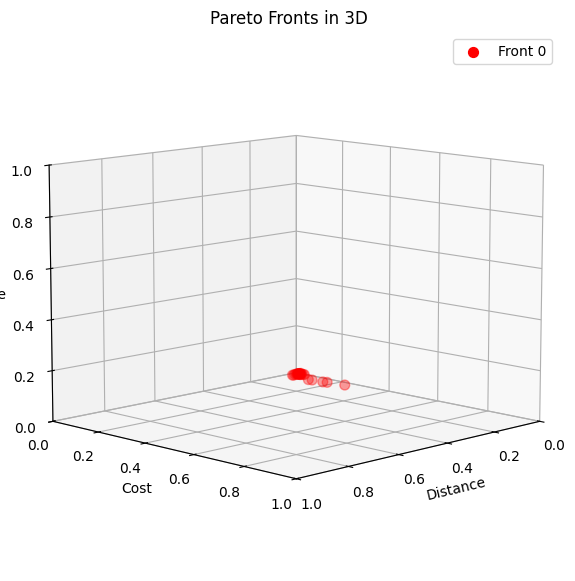

     8 |     3999 |     31 |  0.2522990874 |         nadir
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.007652 0.023012 0.00002 ]
 [0.005141 0.020431 0.000057]
 [0.008807 0.018499 0.000057]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.007161 0.024161 0.00002 ]
 [0.043515 0.159574 0.      ]
 [0.029618 0.240751 0.      ]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.046496 0.115991 0.      ]
 [0.03904  0.173966 0.      ]
 [0.013243 0.031422 0.000012]
 [0.00889  0.01906  0.000016]
 [0.006627 0.019692 0.000049]
 [0.       1.215164 0.16985 ]
 [0.011767 0.018273 0.000055]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.011726 0.018325 0.000022]
 [0.014323 0.016651 0.0

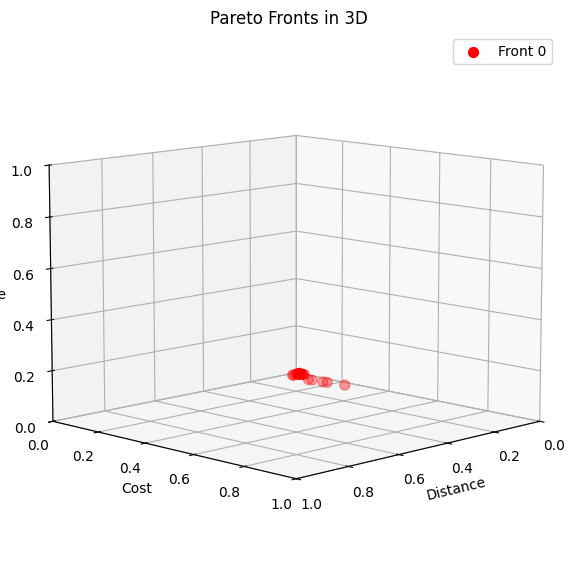

     9 |     4499 |     30 |  0.0026782158 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.007652 0.023012 0.00002 ]
 [0.005141 0.020431 0.000057]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.007161 0.024161 0.00002 ]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.046496 0.115991 0.      ]
 [0.013243 0.031422 0.000012]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.011726 0.018325 0.000022]
 [0.014323 0.016651 0.000013]
 [0.029316 0.147682 0.      ]
 [0.002898 0.02709  0.000084]
 [0.006561 0.017267 0.000049]
 [0.006986 0.027695 0.000023]
 [0.00664  0.019111 0.00004 ]]


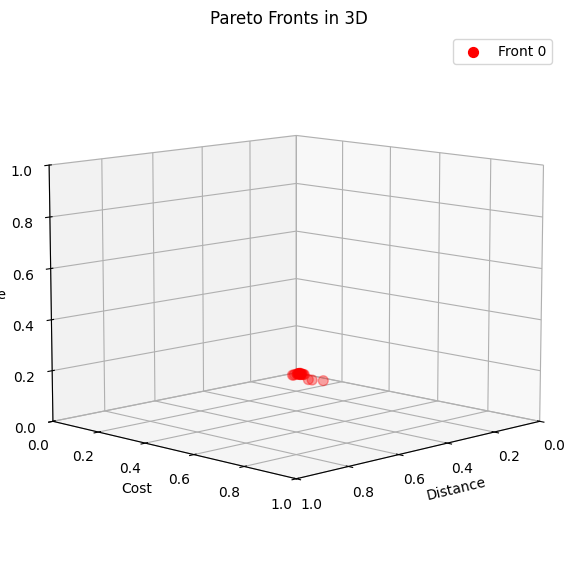

    10 |     4999 |     39 |  0.0091160602 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.007652 0.023012 0.00002 ]
 [0.005141 0.020431 0.000057]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.007161 0.024161 0.00002 ]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.046496 0.115991 0.      ]
 [0.013243 0.031422 0.000012]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.029316 0.147682 0.      ]
 [0.002898 0.02709  0.000084]
 [0.006561 0.017267 0.000049]
 [0.006986 0.027695 0.000023]
 [0.00664  0.019111 0.00004 ]
 [0.008665 0.038429 0.00001 ]
 [0.048446 0.113152 0. 

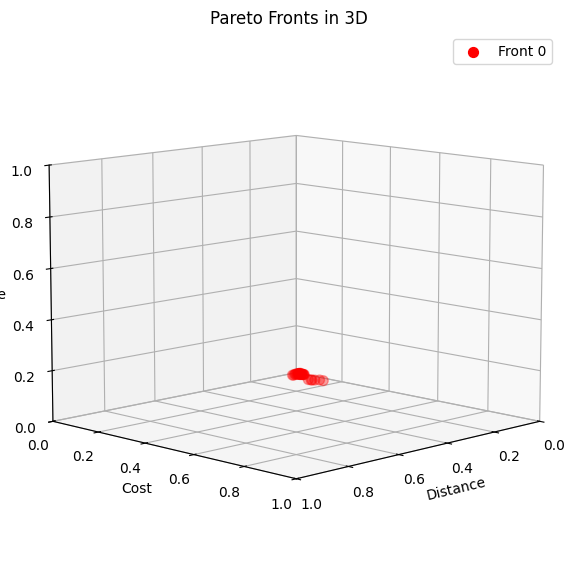

    11 |     5499 |     39 |  0.6407995423 |         nadir
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.005141 0.020431 0.000057]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.046496 0.115991 0.      ]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.029316 0.147682 0.      ]
 [0.006561 0.017267 0.000049]
 [0.00664  0.019111 0.00004 ]
 [0.008665 0.038429 0.00001 ]
 [0.048446 0.113152 0.      ]
 [0.005209 0.029664 0.000023]
 [0.029671 0.131782 0.      ]
 [0.004203 0.036399 0.000014]
 [0.041147 0.122342 0.      ]
 [0.009888 0.022875 0.0

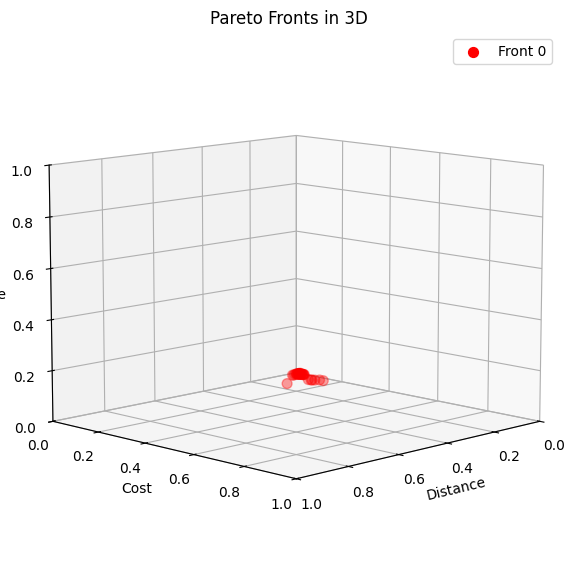

    12 |     5999 |     42 |  0.0005014796 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.005141 0.020431 0.000057]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.00664  0.019111 0.00004 ]
 [0.008665 0.038429 0.00001 ]
 [0.048446 0.113152 0.      ]
 [0.005209 0.029664 0.000023]
 [0.029671 0.131782 0.      ]
 [0.004203 0.036399 0.000014]
 [0.041147 0.122342 0.      ]
 [0.009888 0.022875 0.000015]
 [0.017942 0.016552 0.000017]
 [0.011153 0.018117 0.000021]
 [0.006852 0.022602 0.0

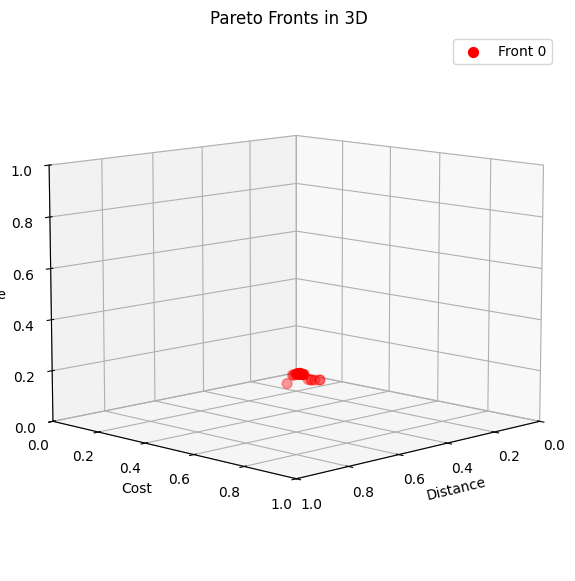

    13 |     6499 |     44 |  0.0009032276 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.005141 0.020431 0.000057]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.00664  0.019111 0.00004 ]
 [0.008665 0.038429 0.00001 ]
 [0.048446 0.113152 0.      ]
 [0.005209 0.029664 0.000023]
 [0.029671 0.131782 0.      ]
 [0.004203 0.036399 0.000014]
 [0.009888 0.022875 0.000015]
 [0.017942 0.016552 0.000017]
 [0.011153 0.018117 0.000021]
 [0.006852 0.022602 0.000017]
 [0.13983  0.099681 0. 

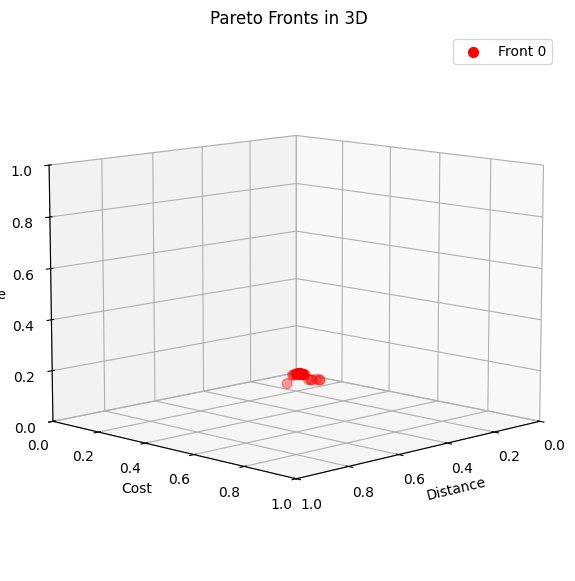

    14 |     6999 |     48 |  0.6178784653 |         nadir
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.005141 0.020431 0.000057]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.00664  0.019111 0.00004 ]
 [0.008665 0.038429 0.00001 ]
 [0.005209 0.029664 0.000023]
 [0.029671 0.131782 0.      ]
 [0.004203 0.036399 0.000014]
 [0.009888 0.022875 0.000015]
 [0.017942 0.016552 0.000017]
 [0.011153 0.018117 0.000021]
 [0.006852 0.022602 0.000017]
 [0.002893 0.023575 0.000084]
 [0.013783 0.015106 0.0

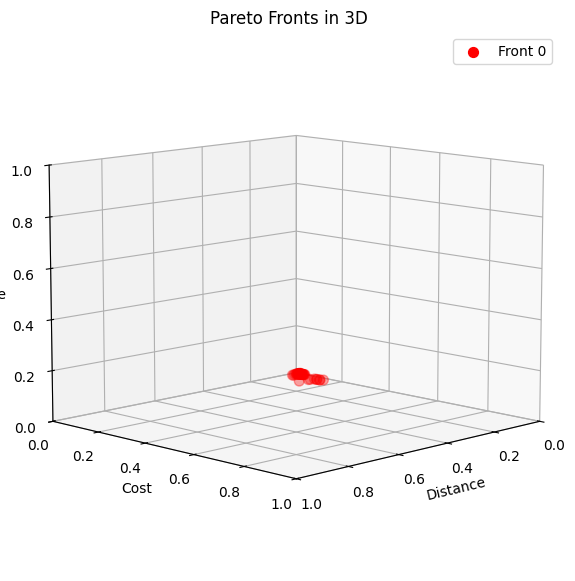

    15 |     7499 |     49 |  0.0002342337 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.00664  0.019111 0.00004 ]
 [0.008665 0.038429 0.00001 ]
 [0.005209 0.029664 0.000023]
 [0.029671 0.131782 0.      ]
 [0.004203 0.036399 0.000014]
 [0.009888 0.022875 0.000015]
 [0.017942 0.016552 0.000017]
 [0.011153 0.018117 0.000021]
 [0.006852 0.022602 0.000017]
 [0.013783 0.015106 0.000024]
 [0.008117 0.022181 0.000029]
 [0.011849 0.026862 0.0

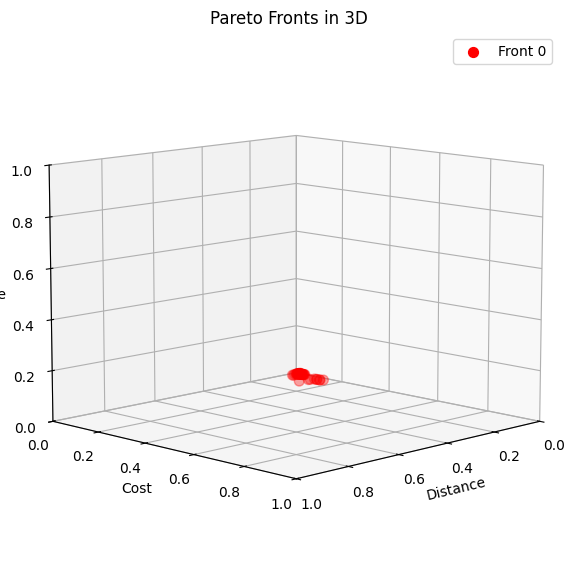

    16 |     7999 |     58 |  0.1188959660 |         nadir
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.007379 0.019226 0.00003 ]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.       1.839781 0.121577]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.00664  0.019111 0.00004 ]
 [0.008665 0.038429 0.00001 ]
 [0.005209 0.029664 0.000023]
 [0.029671 0.131782 0.      ]
 [0.004203 0.036399 0.000014]
 [0.009888 0.022875 0.000015]
 [0.017942 0.016552 0.000017]
 [0.011153 0.018117 0.000021]
 [0.006852 0.022602 0.000017]
 [0.013783 0.015106 0.000024]
 [0.008117 0.022181 0.000029]
 [0.011849 0.026862 0.0

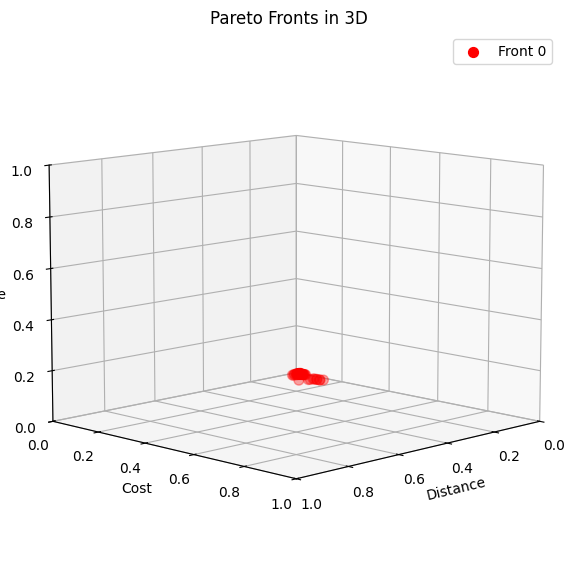

    17 |     8499 |     59 |  0.2019900596 |         nadir
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.008665 0.038429 0.00001 ]
 [0.005209 0.029664 0.000023]
 [0.029671 0.131782 0.      ]
 [0.004203 0.036399 0.000014]
 [0.009888 0.022875 0.000015]
 [0.017942 0.016552 0.000017]
 [0.011153 0.018117 0.000021]
 [0.013783 0.015106 0.000024]
 [0.011849 0.026862 0.000009]
 [0.028734 0.133013 0.      ]
 [0.006005 0.016353 0.000048]
 [0.005382 0.028743 0.000023]
 [0.002982 0.040511 0.000018]
 [0.005779 0.031427 0.0

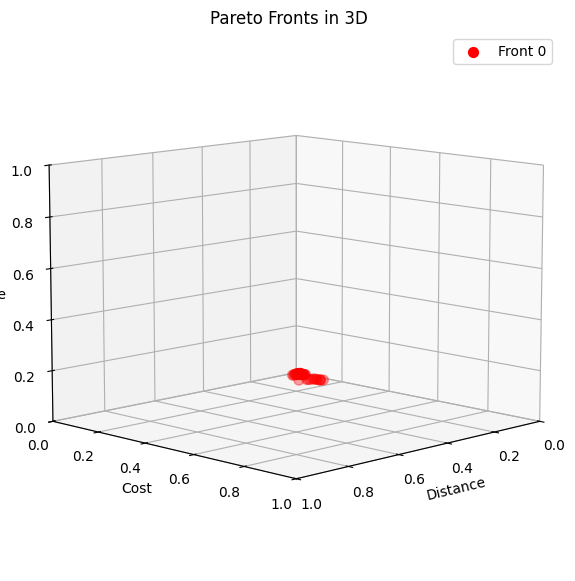

    18 |     8999 |     66 |  0.1413326219 |         nadir
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.005271 0.029311 0.000023]
 [0.035672 0.023246 0.000011]
 [0.050227 0.103027 0.      ]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.003769 0.019902 0.002473]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.008665 0.038429 0.00001 ]
 [0.005209 0.029664 0.000023]
 [0.004203 0.036399 0.000014]
 [0.009888 0.022875 0.000015]
 [0.017942 0.016552 0.000017]
 [0.011153 0.018117 0.000021]
 [0.013783 0.015106 0.000024]
 [0.011849 0.026862 0.000009]
 [0.006005 0.016353 0.000048]
 [0.005382 0.028743 0.000023]
 [0.002982 0.040511 0.000018]
 [0.005779 0.031427 0.000015]
 [0.030279 0.118707 0.      ]
 [0.030448 0.1103   0. 

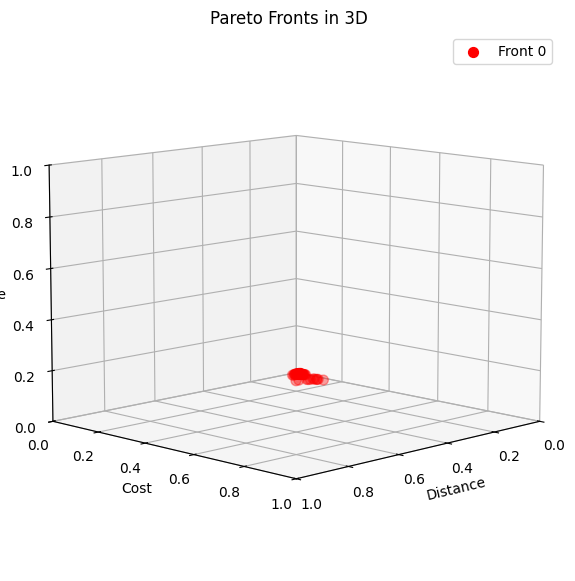

    19 |     9499 |     57 |  0.0010356274 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.008727 0.018855 0.000029]
 [0.024768 0.017327 0.000012]
 [0.005913 0.028976 0.000014]
 [0.035672 0.023246 0.000011]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.008665 0.038429 0.00001 ]
 [0.004203 0.036399 0.000014]
 [0.009888 0.022875 0.000015]
 [0.017942 0.016552 0.000017]
 [0.011153 0.018117 0.000021]
 [0.013783 0.015106 0.000024]
 [0.011849 0.026862 0.000009]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.021678 0.140664 0.      ]
 [0.006355 0.026127 0.000024]
 [0.002891 0.020419 0.000055]
 [0.01107  0.015521 0.000046]
 [0.009475 0.018376 0.000016]
 [0.01482  0.029847 0.000006]
 [0.077244 0.08853  0.      ]
 [0.008053 0.03441  0.0

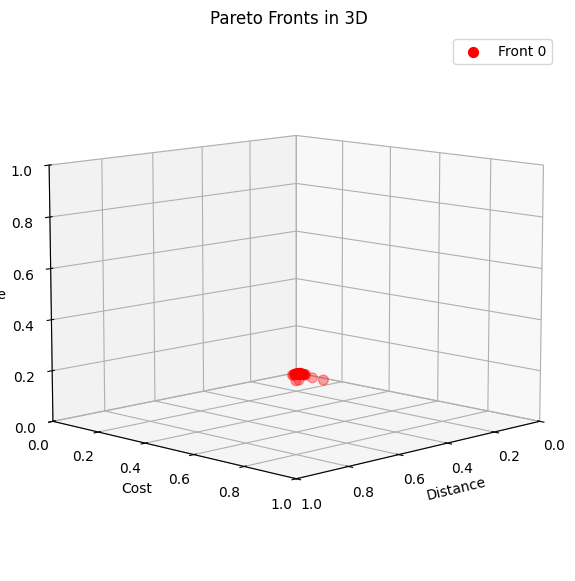

    20 |     9999 |     53 |  0.0021939675 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.024768 0.017327 0.000012]
 [0.035672 0.023246 0.000011]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.008665 0.038429 0.00001 ]
 [0.004203 0.036399 0.000014]
 [0.017942 0.016552 0.000017]
 [0.011153 0.018117 0.000021]
 [0.013783 0.015106 0.000024]
 [0.011849 0.026862 0.000009]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.009475 0.018376 0.000016]
 [0.01482  0.029847 0.000006]
 [0.077244 0.08853  0.      ]
 [0.008053 0.03441  0.000011]
 [0.00517  0.017823 0.00024 ]
 [0.005218 0.0184   0.000098]
 [0.02454  0.016251 0.000013]
 [0.003954 0.045381 0.000014]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.010734 0.016866 0.0

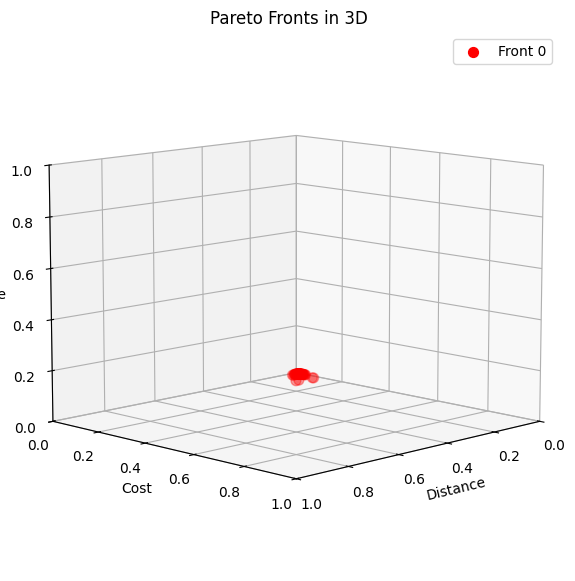

    21 |    10499 |     54 |  0.0041114944 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.008263 0.023524 0.000016]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.024768 0.017327 0.000012]
 [0.0361   0.018987 0.000011]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.004203 0.036399 0.000014]
 [0.017942 0.016552 0.000017]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.009475 0.018376 0.000016]
 [0.01482  0.029847 0.000006]
 [0.077244 0.08853  0.      ]
 [0.00517  0.017823 0.00024 ]
 [0.005218 0.0184   0.000098]
 [0.02454  0.016251 0.000013]
 [0.003954 0.045381 0.000014]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.010734 0.016866 0.000022]
 [0.01486  0.025509 0.000006]
 [0.089958 0.088472 0.      ]
 [0.024594 0.019152 0.000012]
 [0.008262 0.018516 0.00003 ]
 [0.008546 0.016266 0.0

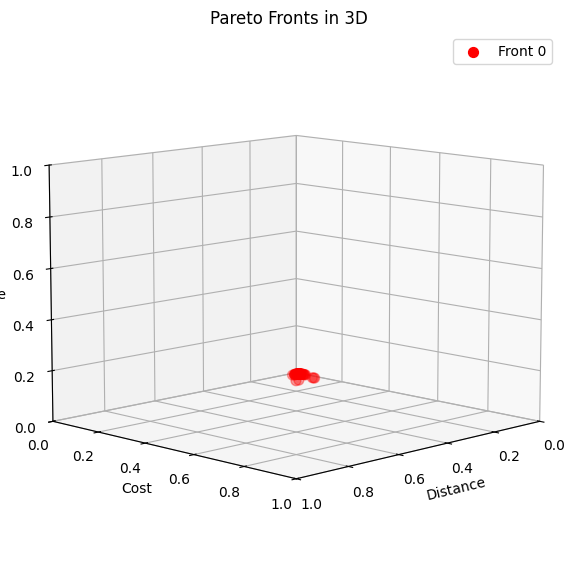

    22 |    10999 |     57 |  0.0023736480 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.024768 0.017327 0.000012]
 [0.00889  0.01906  0.000016]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.004203 0.036399 0.000014]
 [0.017942 0.016552 0.000017]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.009475 0.018376 0.000016]
 [0.01482  0.029847 0.000006]
 [0.077244 0.08853  0.      ]
 [0.00517  0.017823 0.00024 ]
 [0.005218 0.0184   0.000098]
 [0.02454  0.016251 0.000013]
 [0.003954 0.045381 0.000014]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.010734 0.016866 0.000022]
 [0.01486  0.025509 0.000006]
 [0.089958 0.088472 0.      ]
 [0.008262 0.018516 0.00003 ]
 [0.008546 0.016266 0.000193]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.004876 0.042364 0.0

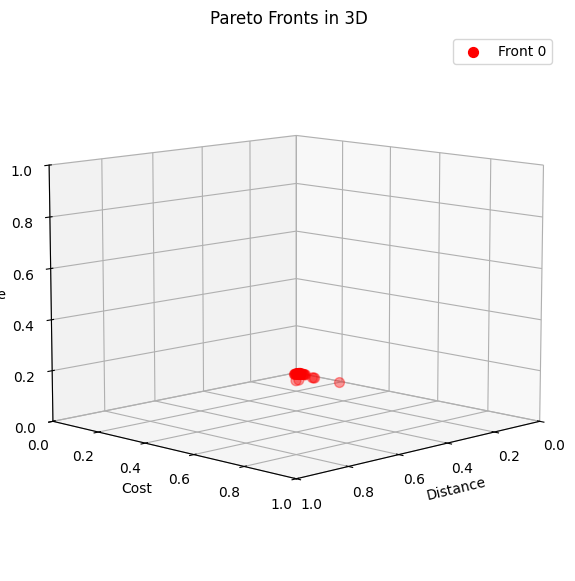

    23 |    11499 |     55 |  0.0034743042 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.004203 0.036399 0.000014]
 [0.017942 0.016552 0.000017]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.01482  0.029847 0.000006]
 [0.077244 0.08853  0.      ]
 [0.00517  0.017823 0.00024 ]
 [0.005218 0.0184   0.000098]
 [0.003954 0.045381 0.000014]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.089958 0.088472 0.      ]
 [0.008262 0.018516 0.00003 ]
 [0.008546 0.016266 0.000193]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.004876 0.042364 0.000012]
 [0.021692 0.092208 0.      ]
 [0.002149 0.028649 0.000015]
 [0.001665 0.019496 0.000029]
 [0.009364 0.015006 0.00003 ]
 [0.002563 0.019041 0.0

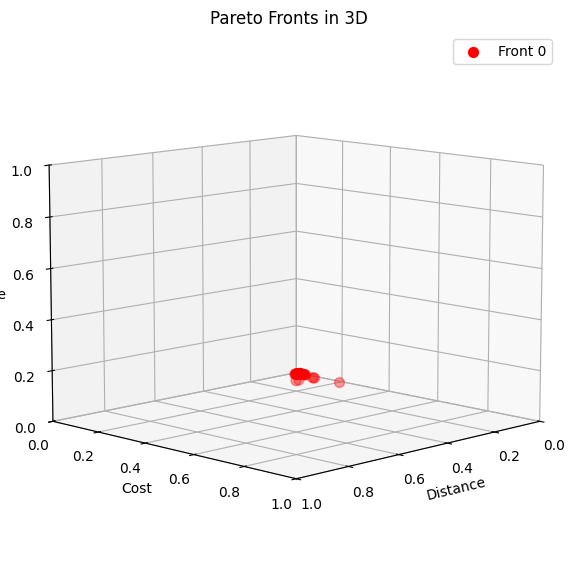

    24 |    11999 |     57 |  0.0004587203 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.004203 0.036399 0.000014]
 [0.017942 0.016552 0.000017]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.01482  0.029847 0.000006]
 [0.077244 0.08853  0.      ]
 [0.00517  0.017823 0.00024 ]
 [0.005218 0.0184   0.000098]
 [0.003954 0.045381 0.000014]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.089958 0.088472 0.      ]
 [0.008262 0.018516 0.00003 ]
 [0.008546 0.016266 0.000193]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.004876 0.042364 0.000012]
 [0.021692 0.092208 0.      ]
 [0.002149 0.028649 0.000015]
 [0.001665 0.019496 0.000029]
 [0.002563 0.019041 0.000057]
 [0.009357 0.020319 0.0

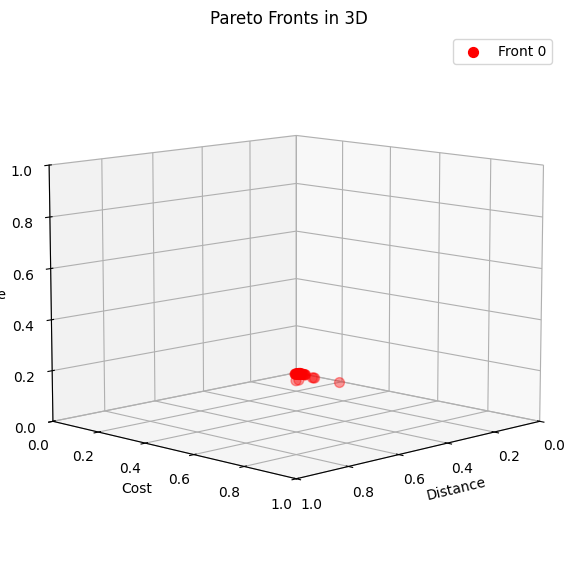

    25 |    12499 |     59 |  0.0013452607 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.004203 0.036399 0.000014]
 [0.017942 0.016552 0.000017]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.01482  0.029847 0.000006]
 [0.077244 0.08853  0.      ]
 [0.00517  0.017823 0.00024 ]
 [0.005218 0.0184   0.000098]
 [0.003954 0.045381 0.000014]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.089958 0.088472 0.      ]
 [0.008262 0.018516 0.00003 ]
 [0.008546 0.016266 0.000193]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.004876 0.042364 0.000012]
 [0.021692 0.092208 0.      ]
 [0.002149 0.028649 0.000015]
 [0.001665 0.019496 0.000029]
 [0.009357 0.020319 0.000013]
 [0.00342  0.018642 0.0

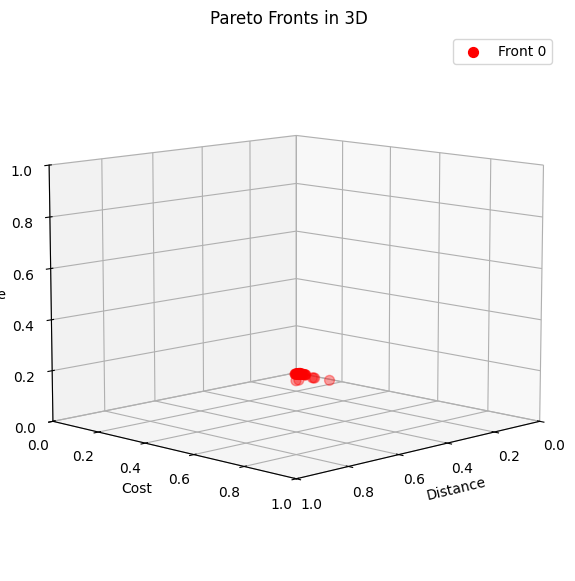

    26 |    12999 |     58 |  1.6882022472 |         nadir
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.004203 0.036399 0.000014]
 [0.017942 0.016552 0.000017]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.01482  0.029847 0.000006]
 [0.003954 0.045381 0.000014]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.004876 0.042364 0.000012]
 [0.021692 0.092208 0.      ]
 [0.002149 0.028649 0.000015]
 [0.009357 0.020319 0.000013]
 [0.00342  0.018642 0.000017]
 [0.005795 0.027714 0.000014]
 [0.020084 0.096467 0.      ]
 [0.006335 0.026247 0.000009]
 [0.007854 0.016349 0.000037]
 [0.019753 0.100647 0.      ]
 [0.005722 0.017866 0.000034]
 [0.008774 0.02326  0.0

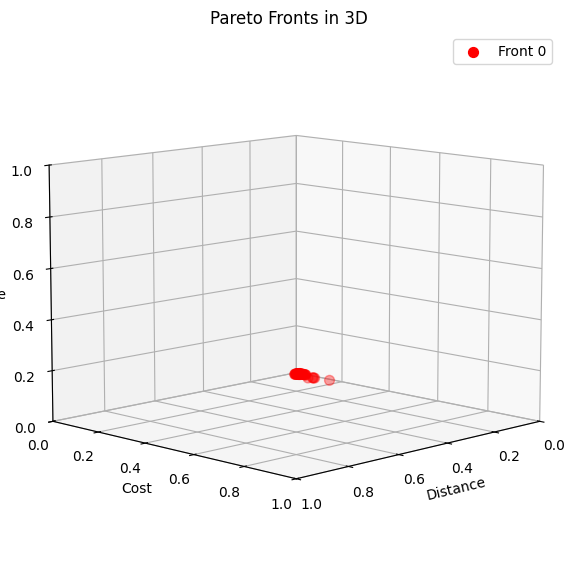

    27 |    13499 |     62 |  0.0010275020 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.004203 0.036399 0.000014]
 [0.017942 0.016552 0.000017]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.01482  0.029847 0.000006]
 [0.003954 0.045381 0.000014]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.004876 0.042364 0.000012]
 [0.021692 0.092208 0.      ]
 [0.002149 0.028649 0.000015]
 [0.009357 0.020319 0.000013]
 [0.00342  0.018642 0.000017]
 [0.005795 0.027714 0.000014]
 [0.020084 0.096467 0.      ]
 [0.006335 0.026247 0.000009]
 [0.007854 0.016349 0.000037]
 [0.019753 0.100647 0.      ]
 [0.005722 0.017866 0.000034]
 [0.008774 0.02326  0.0

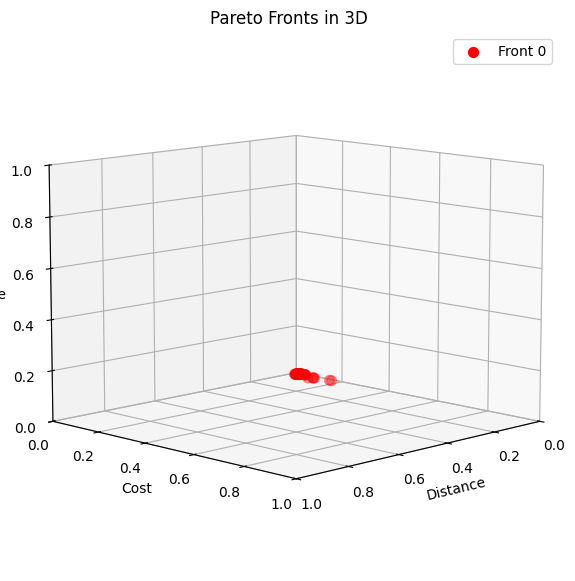

    28 |    13999 |     66 |  0.0032522707 |             f
len front_points: [[0.00419  0.039791 0.000014]
 [0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.004515 0.036163 0.000014]
 [0.       1.215164 0.16985 ]
 [0.005515 0.035364 0.000012]
 [0.014323 0.016651 0.000013]
 [0.004203 0.036399 0.000014]
 [0.017942 0.016552 0.000017]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.01482  0.029847 0.000006]
 [0.003954 0.045381 0.000014]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.004876 0.042364 0.000012]
 [0.021692 0.092208 0.      ]
 [0.002149 0.028649 0.000015]
 [0.009357 0.020319 0.000013]
 [0.00342  0.018642 0.000017]
 [0.005795 0.027714 0.000014]
 [0.020084 0.096467 0.      ]
 [0.006335 0.026247 0.000009]
 [0.007854 0.016349 0.000037]
 [0.005722 0.017866 0.000034]
 [0.008774 0.02326  0.000013]
 [0.013182 0.026136 0.0

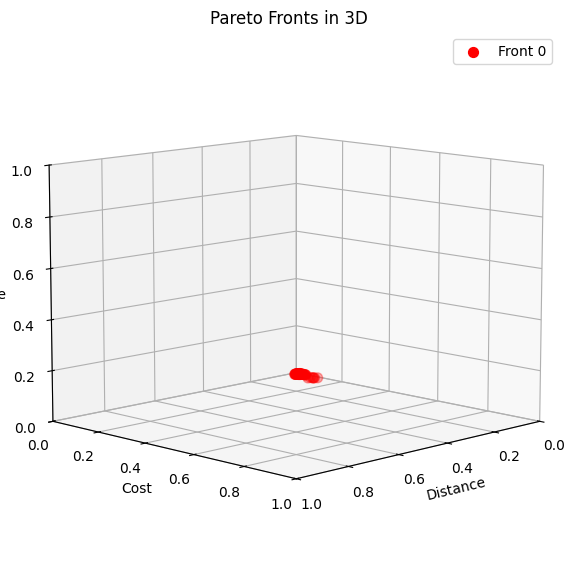

    29 |    14499 |     60 |  0.0005544134 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.       1.215164 0.16985 ]
 [0.014323 0.016651 0.000013]
 [0.017942 0.016552 0.000017]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.01482  0.029847 0.000006]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.004876 0.042364 0.000012]
 [0.021692 0.092208 0.      ]
 [0.002149 0.028649 0.000015]
 [0.009357 0.020319 0.000013]
 [0.00342  0.018642 0.000017]
 [0.020084 0.096467 0.      ]
 [0.006335 0.026247 0.000009]
 [0.007854 0.016349 0.000037]
 [0.005722 0.017866 0.000034]
 [0.013182 0.026136 0.000009]
 [0.019108 0.0146   0.000017]
 [0.012012 0.01655  0.000022]
 [0.011656 0.023591 0.00001 ]
 [0.008183 0.02236  0.000015]
 [0.006881 0.031074 0.000008]
 [0.004445 0.018547 0.000019]
 [0.00486  0.044177 0.0

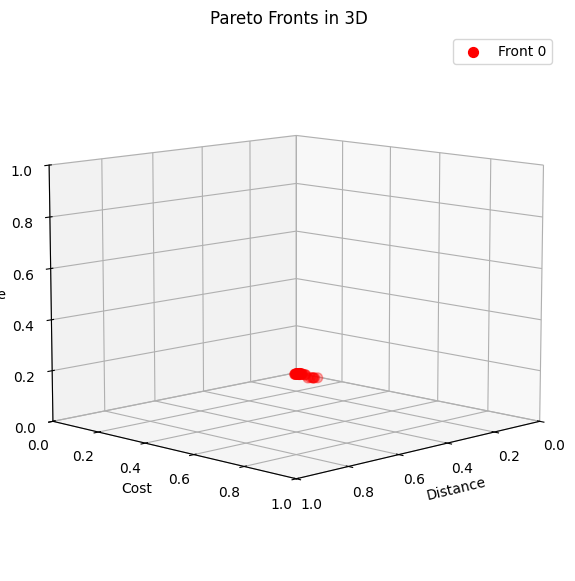

    30 |    14999 |     66 |  0.0028491301 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.       1.215164 0.16985 ]
 [0.014323 0.016651 0.000013]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.01482  0.029847 0.000006]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.021692 0.092208 0.      ]
 [0.002149 0.028649 0.000015]
 [0.009357 0.020319 0.000013]
 [0.00342  0.018642 0.000017]
 [0.020084 0.096467 0.      ]
 [0.006335 0.026247 0.000009]
 [0.007854 0.016349 0.000037]
 [0.005722 0.017866 0.000034]
 [0.013182 0.026136 0.000009]
 [0.019108 0.0146   0.000017]
 [0.012012 0.01655  0.000022]
 [0.011656 0.023591 0.00001 ]
 [0.006881 0.031074 0.000008]
 [0.004445 0.018547 0.000019]
 [0.008874 0.016694 0.000016]
 [0.012184 0.018528 0.00001 ]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.0

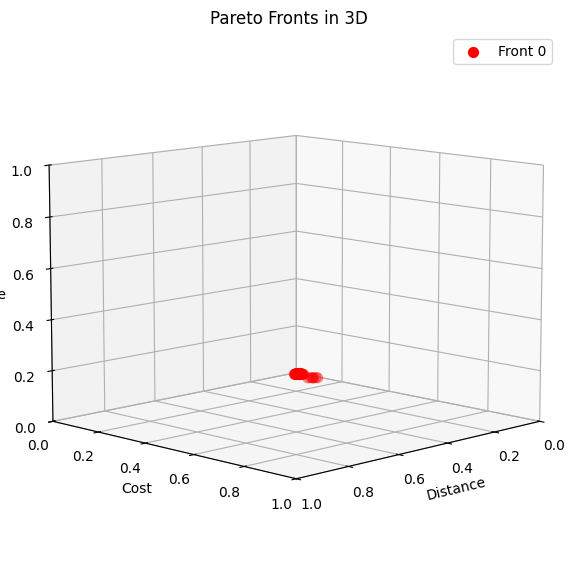

    31 |    15499 |     69 |  0.0005483125 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.012996 0.017056 0.000013]
 [0.       1.215164 0.16985 ]
 [0.014323 0.016651 0.000013]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.010616 0.018949 0.000013]
 [0.01482  0.029847 0.000006]
 [0.018138 0.016256 0.000017]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.019251 0.014245 0.000017]
 [0.003066 0.027517 0.00002 ]
 [0.002149 0.028649 0.000015]
 [0.009357 0.020319 0.000013]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.007854 0.016349 0.000037]
 [0.005722 0.017866 0.000034]
 [0.013182 0.026136 0.000009]
 [0.019108 0.0146   0.000017]
 [0.012012 0.01655  0.000022]
 [0.011656 0.023591 0.00001 ]
 [0.006881 0.031074 0.000008]
 [0.004445 0.018547 0.000019]
 [0.008874 0.016694 0.000016]
 [0.012184 0.018528 0.00001 ]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.000011]
 [0.016118 0.016259 0.00002 ]
 [0.011625 0.017891 0.0

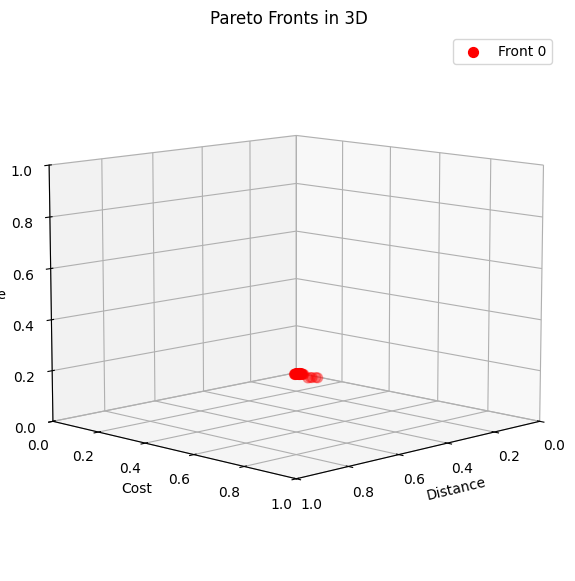

    32 |    15999 |     59 |  0.0019143576 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.01482  0.029847 0.000006]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.007854 0.016349 0.000037]
 [0.011656 0.023591 0.00001 ]
 [0.006881 0.031074 0.000008]
 [0.004445 0.018547 0.000019]
 [0.012184 0.018528 0.00001 ]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.000011]
 [0.016118 0.016259 0.00002 ]
 [0.011625 0.017891 0.000012]
 [0.02354  0.016191 0.00001 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.014894 0.015471 0.000023]
 [0.023328 0.085441 0.      ]
 [0.011857 0.020105 0.000011]
 [0.010038 0.104177 0.      ]
 [0.00208  0.025615 0.000023]
 [0.007952 0.016113 0.000037]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.015574 0.017563 0.0

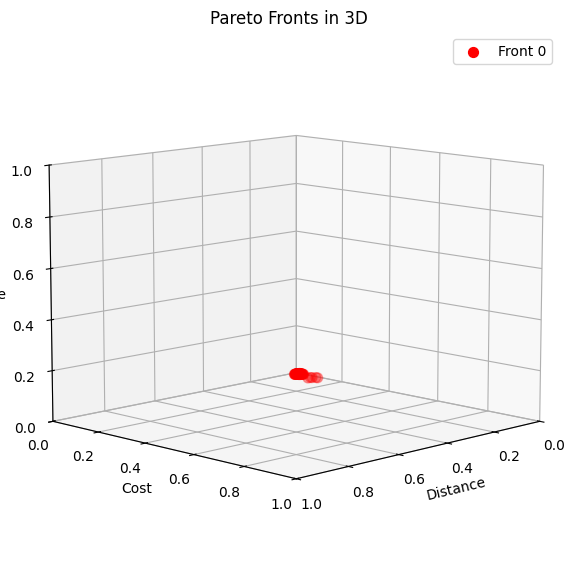

    33 |    16499 |     63 |  0.0029351617 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.01482  0.029847 0.000006]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.007854 0.016349 0.000037]
 [0.011656 0.023591 0.00001 ]
 [0.006881 0.031074 0.000008]
 [0.004445 0.018547 0.000019]
 [0.012184 0.018528 0.00001 ]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.000011]
 [0.016118 0.016259 0.00002 ]
 [0.011625 0.017891 0.000012]
 [0.02354  0.016191 0.00001 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.014894 0.015471 0.000023]
 [0.011857 0.020105 0.000011]
 [0.010038 0.104177 0.      ]
 [0.00208  0.025615 0.000023]
 [0.007952 0.016113 0.000037]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.015574 0.017563 0.000009]
 [0.010866 0.09741  0. 

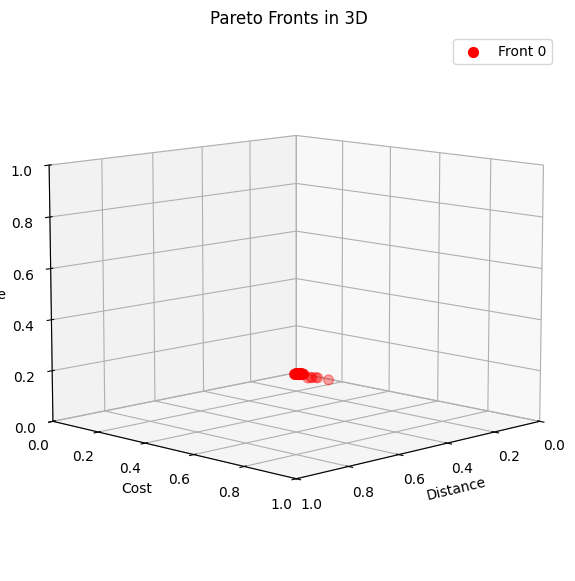

    34 |    16999 |     61 |  0.0002659507 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.01482  0.029847 0.000006]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.011656 0.023591 0.00001 ]
 [0.004445 0.018547 0.000019]
 [0.012184 0.018528 0.00001 ]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.000011]
 [0.016118 0.016259 0.00002 ]
 [0.011625 0.017891 0.000012]
 [0.02354  0.016191 0.00001 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.014894 0.015471 0.000023]
 [0.011857 0.020105 0.000011]
 [0.010038 0.104177 0.      ]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.015574 0.017563 0.000009]
 [0.010866 0.09741  0.      ]
 [0.017041 0.014293 0.000018]
 [0.015934 0.01705  0.000011]
 [0.022218 0.013931 0.0

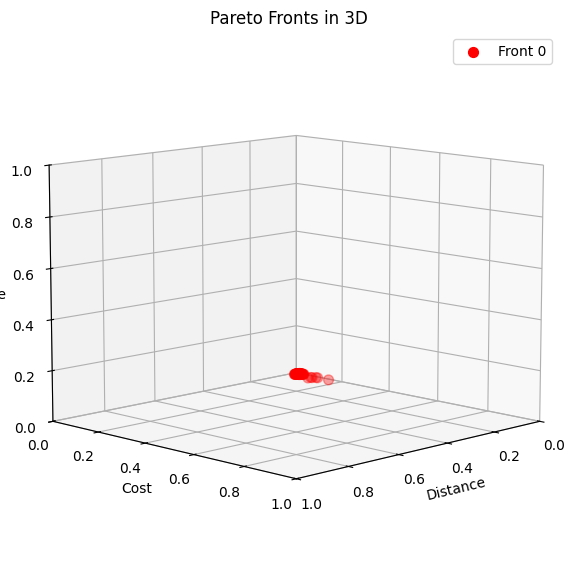

    35 |    17499 |     58 |  0.0012038493 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.01482  0.029847 0.000006]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.000011]
 [0.02354  0.016191 0.00001 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.014894 0.015471 0.000023]
 [0.010038 0.104177 0.      ]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.010866 0.09741  0.      ]
 [0.017041 0.014293 0.000018]
 [0.015934 0.01705  0.000011]
 [0.022218 0.013931 0.000017]
 [0.005517 0.033719 0.000008]
 [0.00345  0.025682 0.000012]
 [0.003371 0.017858 0.000057]
 [0.012973 0.014896 0.000026]
 [0.002415 0.017633 0.000077]
 [0.014901 0.016355 0.0

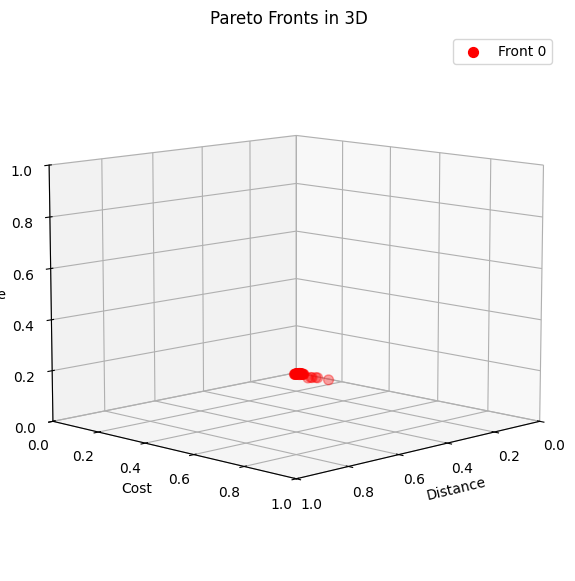

    36 |    17999 |     58 |  0.0030731236 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.01482  0.029847 0.000006]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.000011]
 [0.02354  0.016191 0.00001 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.014894 0.015471 0.000023]
 [0.010038 0.104177 0.      ]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.010866 0.09741  0.      ]
 [0.017041 0.014293 0.000018]
 [0.022218 0.013931 0.000017]
 [0.005517 0.033719 0.000008]
 [0.00345  0.025682 0.000012]
 [0.003371 0.017858 0.000057]
 [0.012973 0.014896 0.000026]
 [0.002415 0.017633 0.000077]
 [0.020072 0.089699 0.      ]
 [0.002252 0.023089 0.0

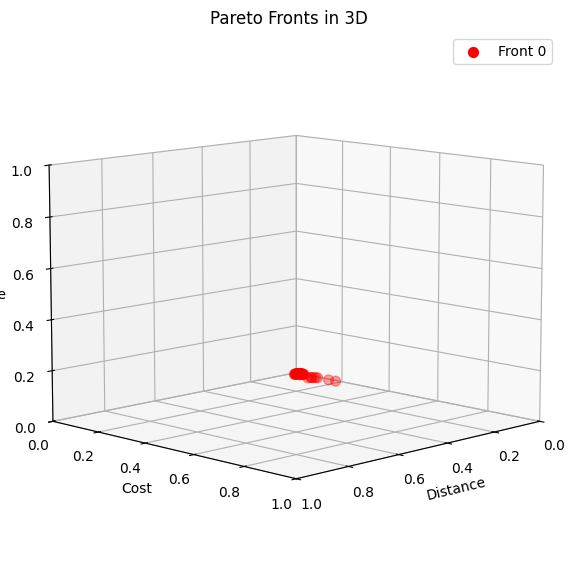

    37 |    18499 |     63 |  0.0014062461 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.01482  0.029847 0.000006]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.000011]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.014894 0.015471 0.000023]
 [0.010038 0.104177 0.      ]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.010866 0.09741  0.      ]
 [0.017041 0.014293 0.000018]
 [0.022218 0.013931 0.000017]
 [0.005517 0.033719 0.000008]
 [0.00345  0.025682 0.000012]
 [0.003371 0.017858 0.000057]
 [0.012973 0.014896 0.000026]
 [0.002415 0.017633 0.000077]
 [0.020072 0.089699 0.      ]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.0

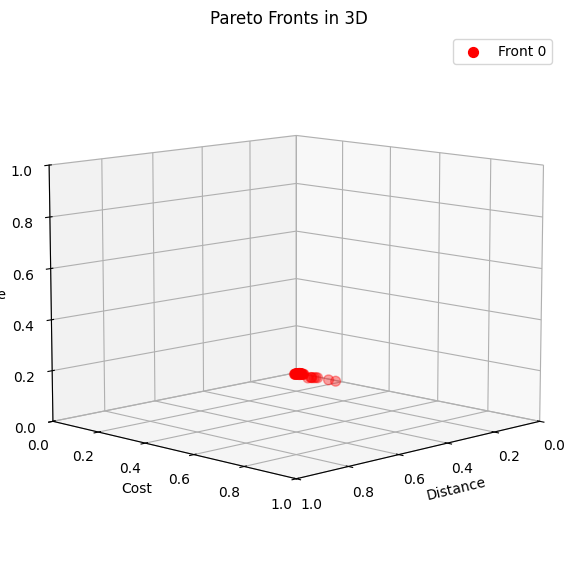

    38 |    18999 |     61 |  0.0025432623 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.01482  0.029847 0.000006]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.000011]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.014894 0.015471 0.000023]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.017041 0.014293 0.000018]
 [0.022218 0.013931 0.000017]
 [0.005517 0.033719 0.000008]
 [0.00345  0.025682 0.000012]
 [0.003371 0.017858 0.000057]
 [0.002415 0.017633 0.000077]
 [0.020072 0.089699 0.      ]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.018092 0.014245 0.000017]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0. 

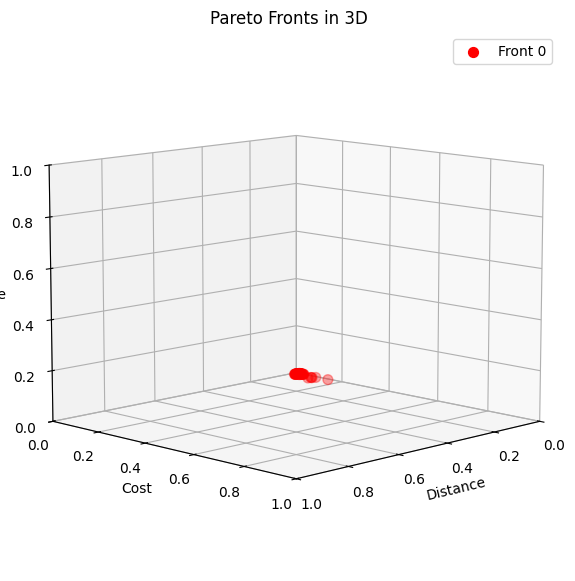

    39 |    19499 |     66 |  0.0006905961 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.01482  0.029847 0.000006]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.020336 0.014814 0.000011]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.014894 0.015471 0.000023]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.017041 0.014293 0.000018]
 [0.022218 0.013931 0.000017]
 [0.005517 0.033719 0.000008]
 [0.00345  0.025682 0.000012]
 [0.003371 0.017858 0.000057]
 [0.002415 0.017633 0.000077]
 [0.020072 0.089699 0.      ]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.018092 0.014245 0.000017]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0. 

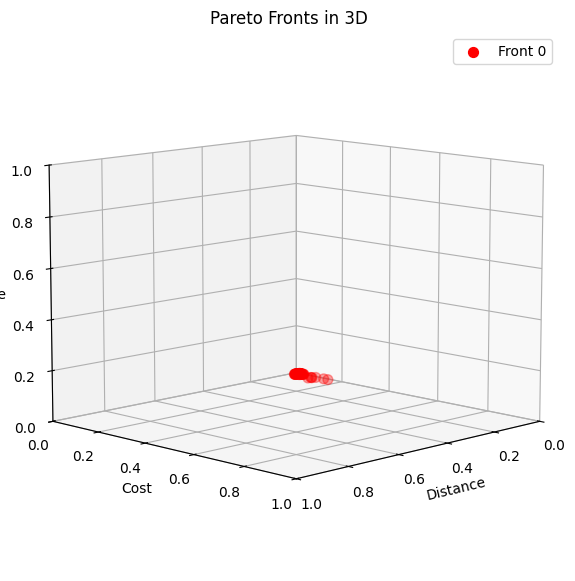

    40 |    19999 |     69 |  0.3106034074 |         nadir
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.014894 0.015471 0.000023]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.017041 0.014293 0.000018]
 [0.022218 0.013931 0.000017]
 [0.005517 0.033719 0.000008]
 [0.00345  0.025682 0.000012]
 [0.003371 0.017858 0.000057]
 [0.002415 0.017633 0.000077]
 [0.020072 0.089699 0.      ]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.018092 0.014245 0.000017]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.008106 0.015164 0.000037]
 [0.002145 0.035757 0.0

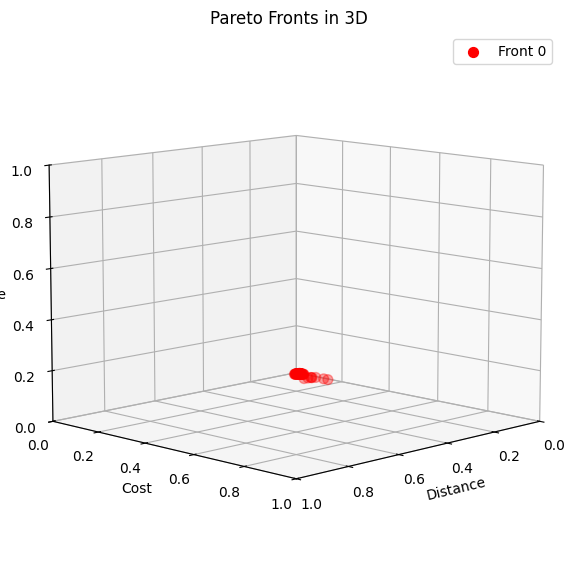

    41 |    20499 |     69 |  0.0005919525 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.017041 0.014293 0.000018]
 [0.022218 0.013931 0.000017]
 [0.005517 0.033719 0.000008]
 [0.00345  0.025682 0.000012]
 [0.002415 0.017633 0.000077]
 [0.020072 0.089699 0.      ]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.018092 0.014245 0.000017]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.008106 0.015164 0.000037]
 [0.006813 0.015587 0.000026]
 [0.00472  0.016326 0.000098]
 [0.006858 0.028293 0.0

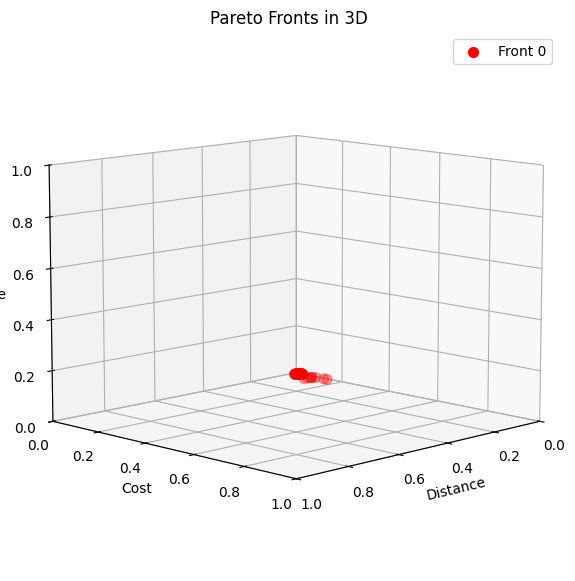

    42 |    20999 |     70 |  0.0019275247 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.006005 0.016353 0.000048]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.002149 0.028649 0.000015]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.005417 0.035206 0.000008]
 [0.017041 0.014293 0.000018]
 [0.005517 0.033719 0.000008]
 [0.00345  0.025682 0.000012]
 [0.002415 0.017633 0.000077]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.008106 0.015164 0.000037]
 [0.006813 0.015587 0.000026]
 [0.00472  0.016326 0.000098]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.005906 0.015542 0.000069]
 [0.006706 0.016195 0.0

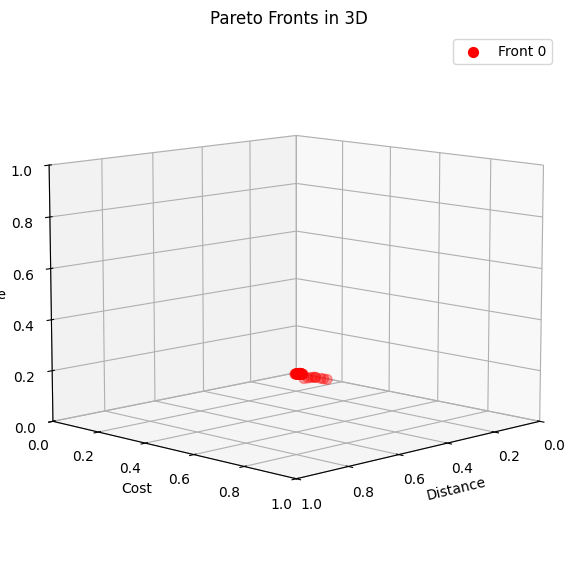

    43 |    21499 |     75 |  0.0027201937 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.008106 0.015164 0.000037]
 [0.006813 0.015587 0.000026]
 [0.00472  0.016326 0.000098]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.005906 0.015542 0.000069]
 [0.006706 0.016195 0.000026]
 [0.003265 0.023245 0.000013]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.014077 0.016454 0.0

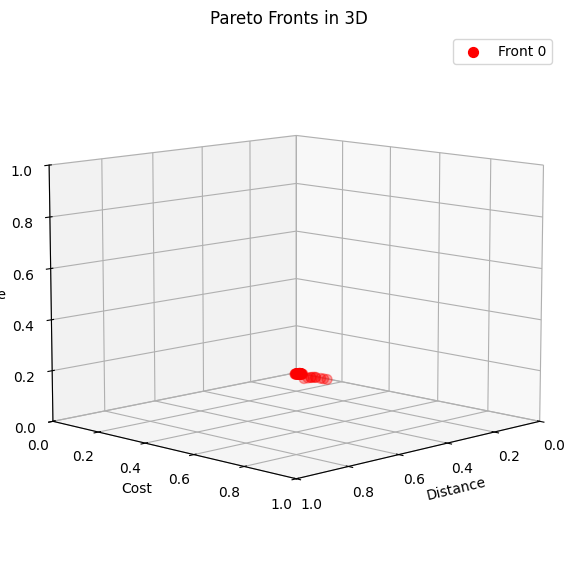

    44 |    21999 |     80 |  0.0005486238 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.008106 0.015164 0.000037]
 [0.006813 0.015587 0.000026]
 [0.00472  0.016326 0.000098]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.005906 0.015542 0.000069]
 [0.006706 0.016195 0.000026]
 [0.003265 0.023245 0.000013]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.014077 0.016454 0.0

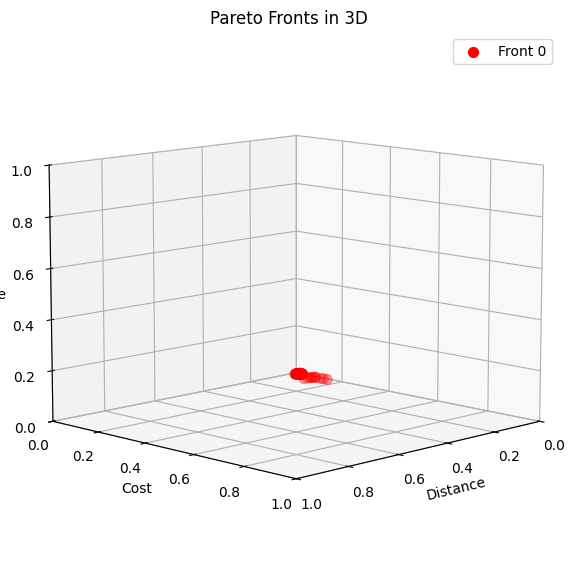

    45 |    22499 |     80 |  0.0005910159 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.003432 0.023009 0.000013]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.008106 0.015164 0.000037]
 [0.006813 0.015587 0.000026]
 [0.00472  0.016326 0.000098]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.005906 0.015542 0.000069]
 [0.006706 0.016195 0.000026]
 [0.003265 0.023245 0.000013]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.014077 0.016454 0.0

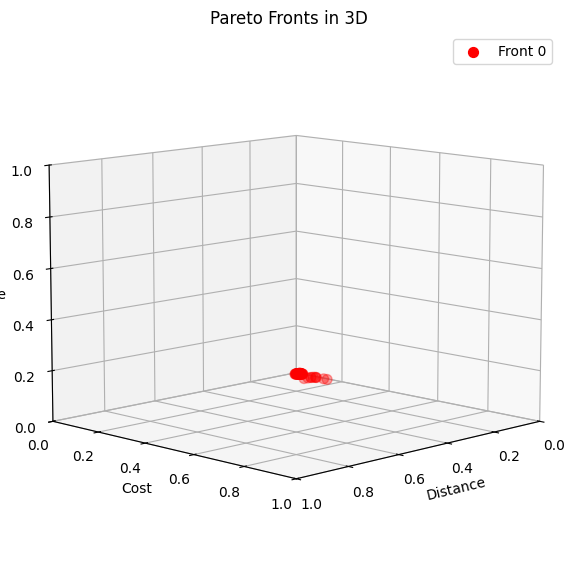

    46 |    22999 |     86 |  0.0010772183 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.013783 0.015106 0.000024]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.008106 0.015164 0.000037]
 [0.006813 0.015587 0.000026]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.005906 0.015542 0.000069]
 [0.006706 0.016195 0.000026]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.014077 0.016454 0.000007]
 [0.001466 0.021006 0.000119]
 [0.004021 0.016366 0.000078]
 [0.010816 0.014767 0.0

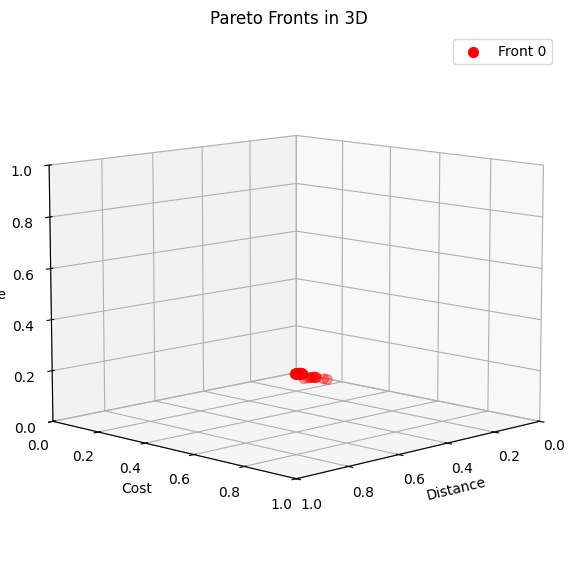

    47 |    23499 |     88 |  0.0012480048 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.01486  0.025509 0.000006]
 [0.00342  0.018642 0.000017]
 [0.006335 0.026247 0.000009]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.006813 0.015587 0.000026]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.005906 0.015542 0.000069]
 [0.006706 0.016195 0.000026]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.014077 0.016454 0.000007]
 [0.004021 0.016366 0.000078]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0. 

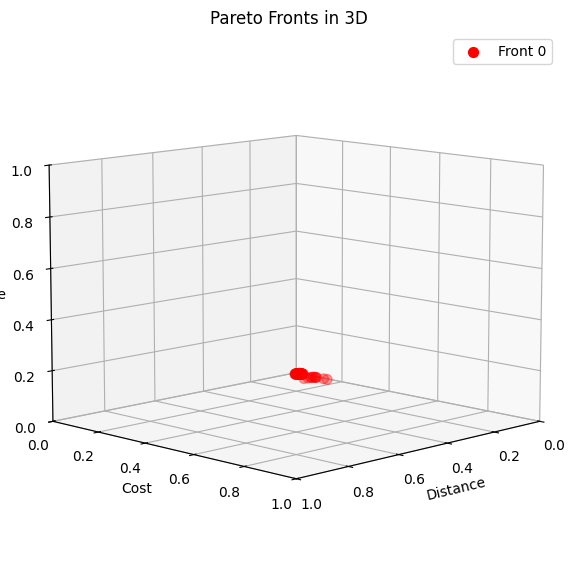

    48 |    23999 |     85 |  0.0017997485 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.00342  0.018642 0.000017]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.006813 0.015587 0.000026]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.005906 0.015542 0.000069]
 [0.006706 0.016195 0.000026]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.004021 0.016366 0.000078]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.00325  0.018926 0.000017]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0. 

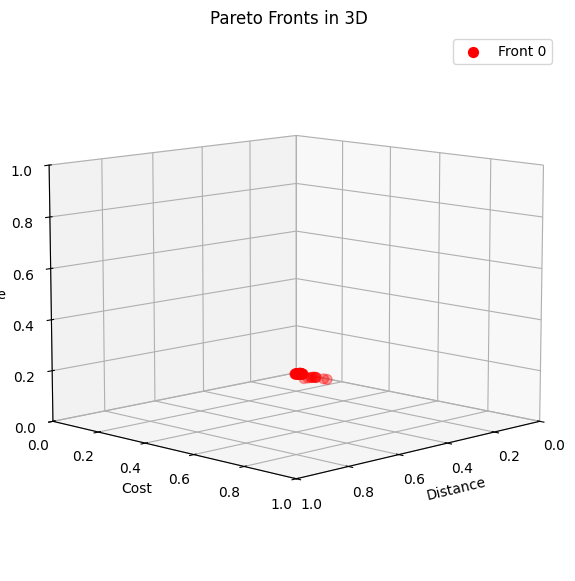

    49 |    24499 |     85 |  0.0018797547 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.00342  0.018642 0.000017]
 [0.004445 0.018547 0.000019]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.006813 0.015587 0.000026]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.005906 0.015542 0.000069]
 [0.006706 0.016195 0.000026]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.004021 0.016366 0.000078]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.00325  0.018926 0.000017]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0. 

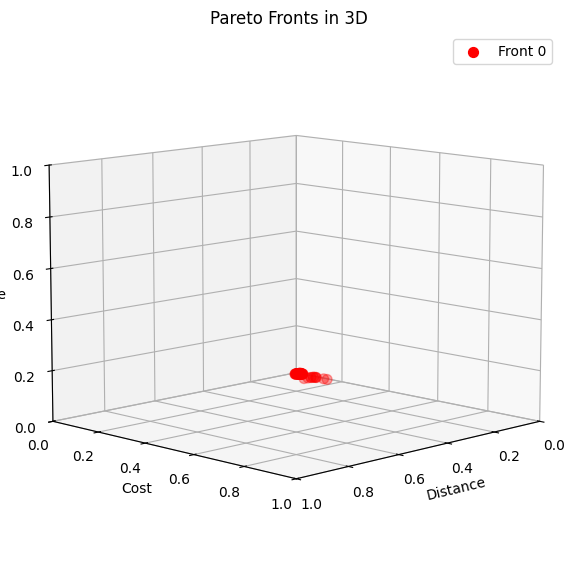

    50 |    24999 |     86 |  0.0018286549 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.006813 0.015587 0.000026]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.005906 0.015542 0.000069]
 [0.006706 0.016195 0.000026]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.004021 0.016366 0.000078]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.00325  0.018926 0.000017]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.012878 0.015924 0.00001 ]
 [0.004736 0.017121 0.0

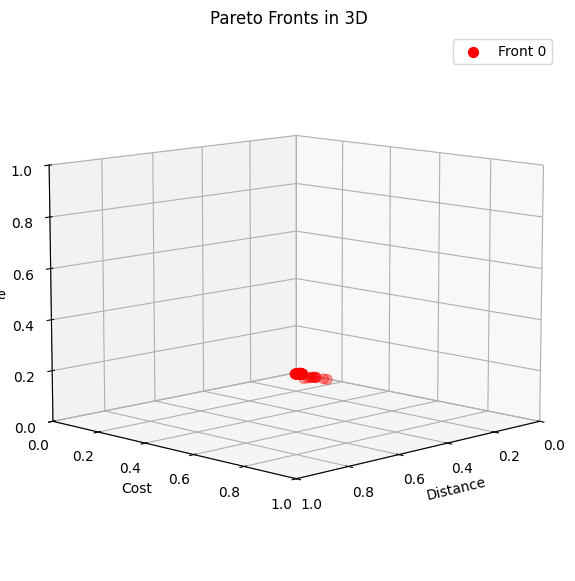

    51 |    25499 |     82 |  0.0021663226 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.007919 0.015492 0.000191]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.004021 0.016366 0.000078]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.00325  0.018926 0.000017]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.012878 0.015924 0.00001 ]
 [0.004736 0.017121 0.000022]
 [0.007284 0.142737 0.      ]
 [0.008544 0.015363 0.000016]
 [0.002053 0.030851 0.0

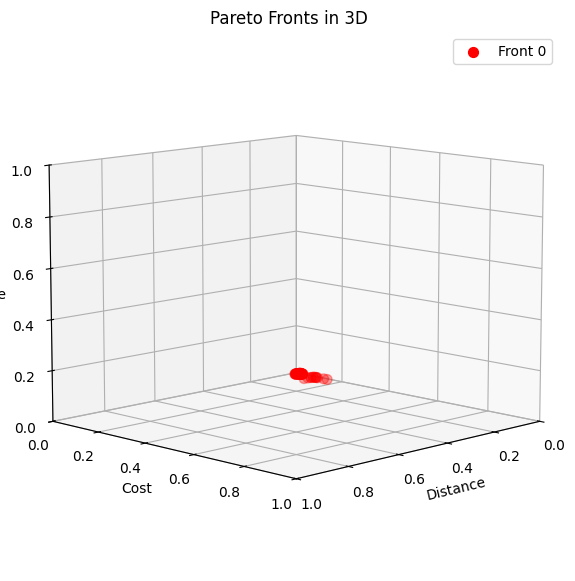

    52 |    25999 |     83 |  0.0024060179 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.00325  0.018926 0.000017]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.004736 0.017121 0.000022]
 [0.007284 0.142737 0.      ]
 [0.002053 0.030851 0.00001 ]
 [0.010826 0.094571 0.      ]
 [0.008918 0.017153 0.000008]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.0

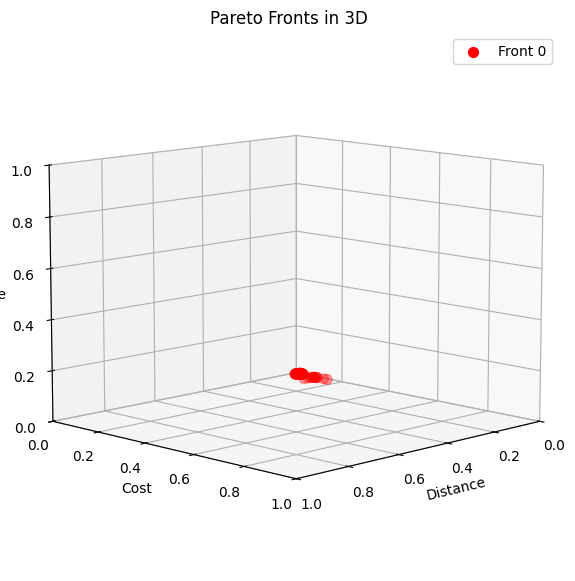

    53 |    26499 |     89 |  0.0026258947 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.00208  0.025615 0.000023]
 [0.017041 0.014293 0.000018]
 [0.00345  0.025682 0.000012]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.00325  0.018926 0.000017]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.004736 0.017121 0.000022]
 [0.007284 0.142737 0.      ]
 [0.002053 0.030851 0.00001 ]
 [0.010826 0.094571 0.      ]
 [0.008918 0.017153 0.000008]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.0

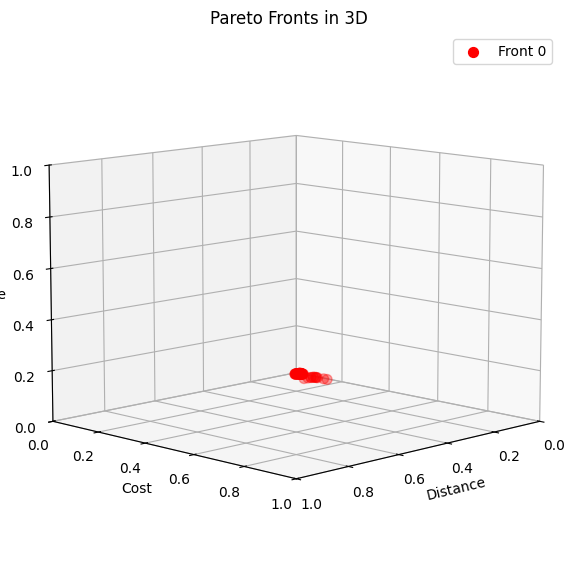

    54 |    26999 |     89 |  0.0003813608 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.017041 0.014293 0.000018]
 [0.002252 0.023089 0.000021]
 [0.004801 0.016379 0.000013]
 [0.008193 0.014731 0.000037]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.006627 0.029181 0.000008]
 [0.0074   0.01766  0.000012]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.00325  0.018926 0.000017]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.007284 0.142737 0.      ]
 [0.010826 0.094571 0.      ]
 [0.008918 0.017153 0.000008]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.000017]
 [0.002308 0.01739  0.000029]
 [0.003344 0.030698 0.000008]
 [0.017093 0.014116 0.000018]
 [0.001813 0.025914 0.0

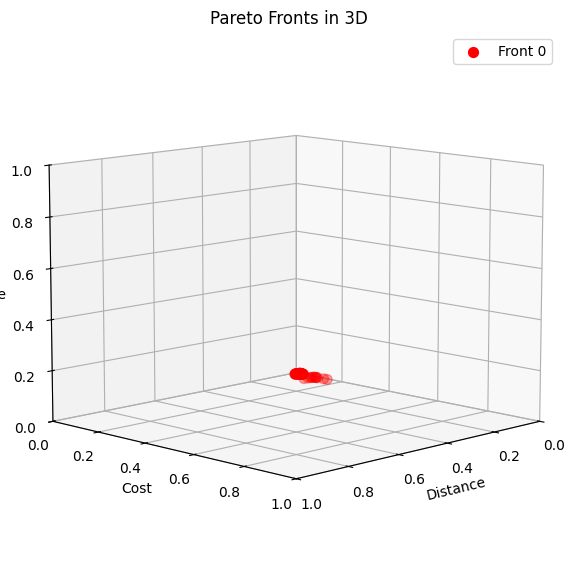

    55 |    27499 |     84 |  0.0005652598 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.017041 0.014293 0.000018]
 [0.004801 0.016379 0.000013]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.006627 0.029181 0.000008]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.007284 0.142737 0.      ]
 [0.010826 0.094571 0.      ]
 [0.008918 0.017153 0.000008]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.000017]
 [0.002308 0.01739  0.000029]
 [0.003344 0.030698 0.000008]
 [0.017093 0.014116 0.000018]
 [0.001813 0.025914 0.000015]
 [0.02106  0.08686  0.      ]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.0

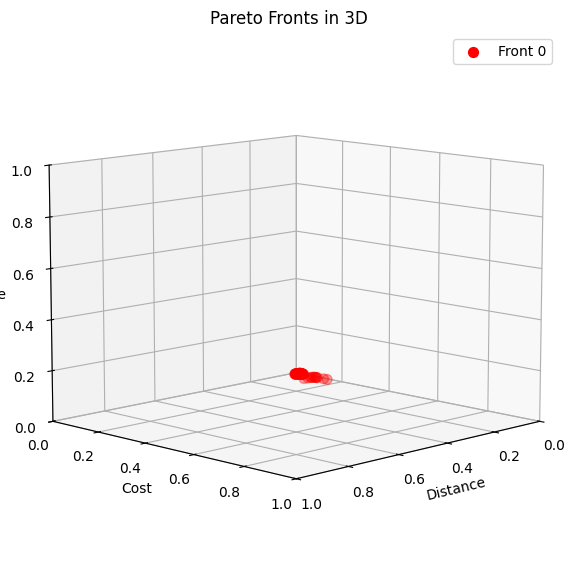

    56 |    27999 |     88 |  0.0008278232 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.00909  0.014601 0.00003 ]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.017041 0.014293 0.000018]
 [0.004801 0.016379 0.000013]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.006627 0.029181 0.000008]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.007284 0.142737 0.      ]
 [0.010826 0.094571 0.      ]
 [0.008918 0.017153 0.000008]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.000017]
 [0.002308 0.01739  0.000029]
 [0.003344 0.030698 0.000008]
 [0.017093 0.014116 0.000018]
 [0.001813 0.025914 0.000015]
 [0.02106  0.08686  0.      ]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.0

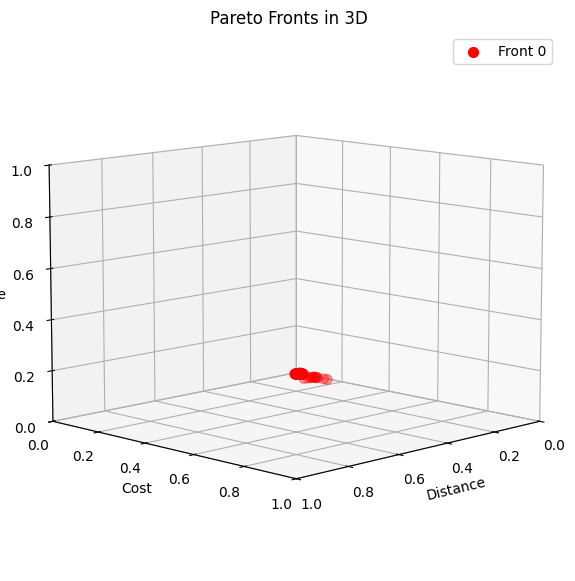

    57 |    28499 |     89 |  0.0011766890 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.006627 0.029181 0.000008]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.007284 0.142737 0.      ]
 [0.010826 0.094571 0.      ]
 [0.008918 0.017153 0.000008]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.000017]
 [0.002308 0.01739  0.000029]
 [0.001813 0.025914 0.000015]
 [0.02106  0.08686  0.      ]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.007892 0.024581 0.000007]
 [0.015653 0.014397 0.000014]
 [0.002741 0.022782 0.0

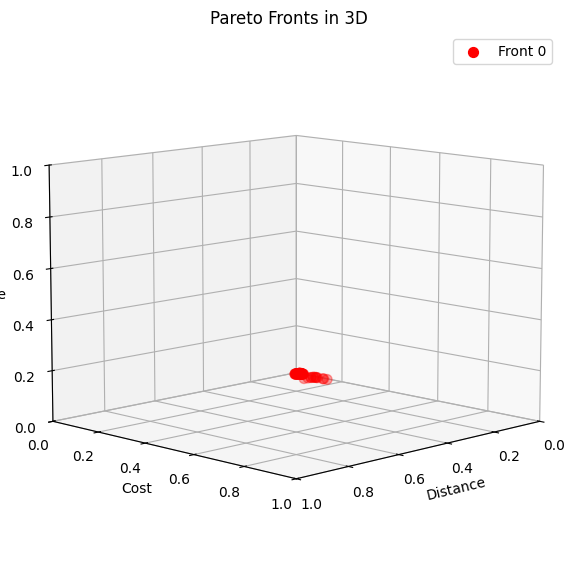

    58 |    28999 |     89 |  0.0012752377 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.008217 0.128542 0.      ]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.007284 0.142737 0.      ]
 [0.010826 0.094571 0.      ]
 [0.008918 0.017153 0.000008]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.000017]
 [0.002308 0.01739  0.000029]
 [0.001813 0.025914 0.000015]
 [0.02106  0.08686  0.      ]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.015653 0.014397 0.000014]
 [0.002741 0.022782 0.000013]
 [0.00367  0.025276 0.000012]
 [0.013031 0.089564 0. 

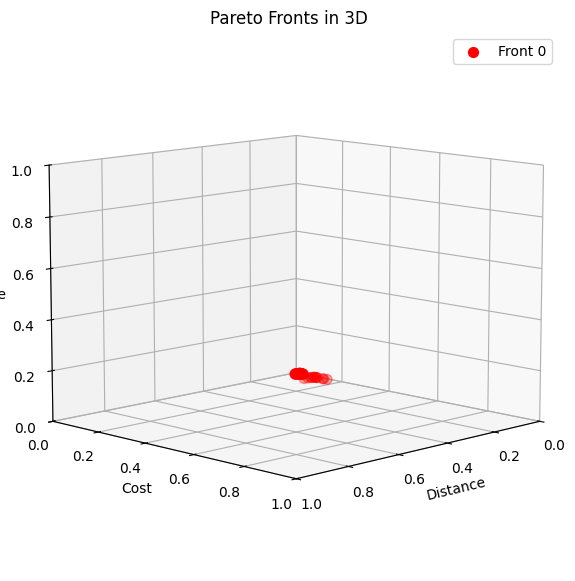

    59 |    29499 |     92 |  0.0014124999 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.007284 0.142737 0.      ]
 [0.010826 0.094571 0.      ]
 [0.008918 0.017153 0.000008]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.000017]
 [0.002308 0.01739  0.000029]
 [0.001813 0.025914 0.000015]
 [0.02106  0.08686  0.      ]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.015653 0.014397 0.000014]
 [0.002741 0.022782 0.000013]
 [0.013031 0.089564 0.      ]
 [0.001787 0.031196 0.000009]
 [0.015552 0.014565 0.0

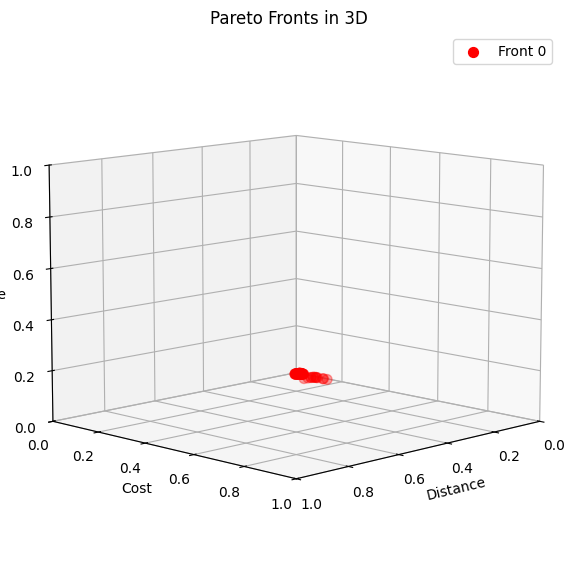

    60 |    29999 |     92 |  0.0018483383 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.010826 0.094571 0.      ]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.000017]
 [0.002308 0.01739  0.000029]
 [0.001813 0.025914 0.000015]
 [0.02106  0.08686  0.      ]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.015653 0.014397 0.000014]
 [0.002741 0.022782 0.000013]
 [0.013031 0.089564 0.      ]
 [0.001787 0.031196 0.000009]
 [0.015552 0.014565 0.000011]
 [0.001216 0.017564 0.000119]
 [0.010442 0.014697 0.0

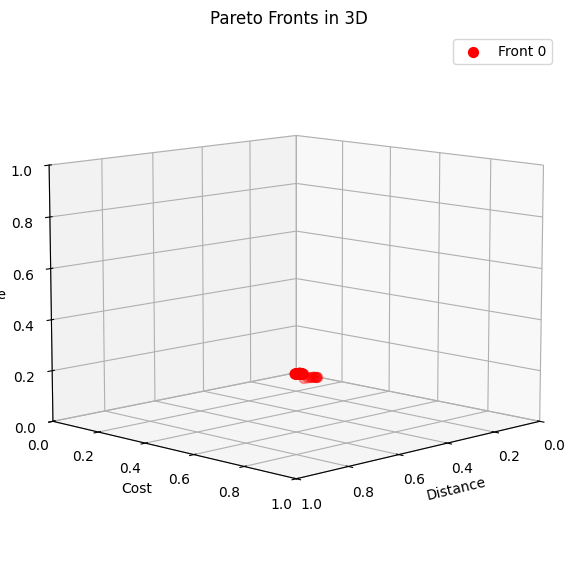

    61 |    30499 |     96 |  0.0022921310 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.021885 0.085441 0.      ]
 [0.006858 0.028293 0.000008]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.001887 0.017859 0.000029]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.010826 0.094571 0.      ]
 [0.013338 0.088144 0.      ]
 [0.017697 0.013064 0.000017]
 [0.002308 0.01739  0.000029]
 [0.001813 0.025914 0.000015]
 [0.02106  0.08686  0.      ]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.002741 0.022782 0.000013]
 [0.013031 0.089564 0.      ]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.010442 0.014697 0.000014]
 [0.001009 0.018506 0.002342]
 [0.011014 0.021546 0.0

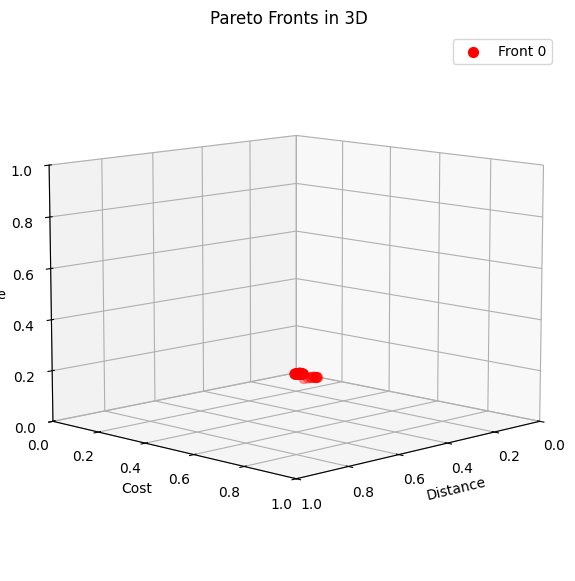

    62 |    30999 |     93 |  0.0026144378 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.002392 0.023593 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.009541 0.01597  0.000008]
 [0.048541 0.082569 0.      ]
 [0.010826 0.094571 0.      ]
 [0.017697 0.013064 0.000017]
 [0.002308 0.01739  0.000029]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.010442 0.014697 0.000014]
 [0.001009 0.018506 0.002342]
 [0.011014 0.021546 0.000006]
 [0.019302 0.013334 0.00001 ]
 [0.013362 0.015508 0.000007]
 [0.009832 0.014568 0.000015]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.009734 0.015733 0.0

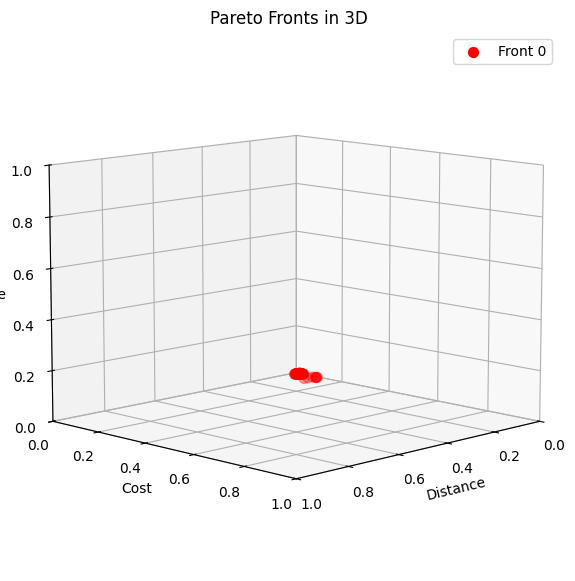

    63 |    31499 |     95 |  0.1476259043 |         nadir
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.048541 0.082569 0.      ]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.010442 0.014697 0.000014]
 [0.001009 0.018506 0.002342]
 [0.011014 0.021546 0.000006]
 [0.019302 0.013334 0.00001 ]
 [0.013362 0.015508 0.000007]
 [0.009832 0.014568 0.000015]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.004013 0.015798 0.000078]
 [0.002755 0.016441 0.000026]
 [0.013027 0.01509  0.00001 ]
 [0.004386 0.016043 0.0

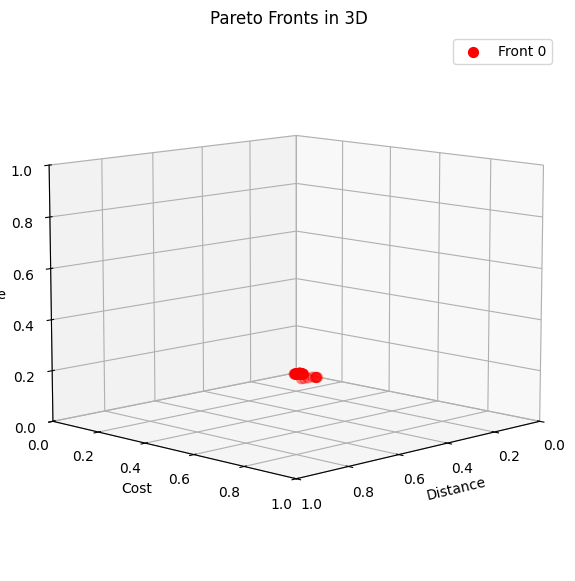

    64 |    31999 |     94 |  0.0001555906 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.048541 0.082569 0.      ]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.010442 0.014697 0.000014]
 [0.001009 0.018506 0.002342]
 [0.019302 0.013334 0.00001 ]
 [0.013362 0.015508 0.000007]
 [0.009832 0.014568 0.000015]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.004013 0.015798 0.000078]
 [0.002755 0.016441 0.000026]
 [0.013027 0.01509  0.00001 ]
 [0.004386 0.016043 0.000025]
 [0.019258 0.013511 0.0

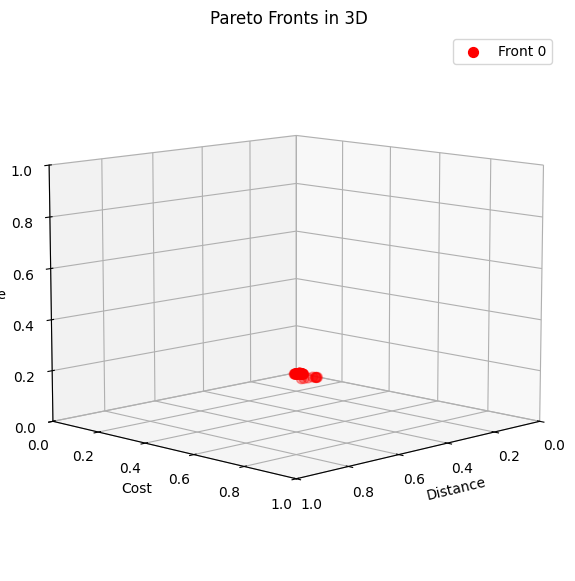

    65 |    32499 |     93 |  0.0004004393 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.048541 0.082569 0.      ]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.010442 0.014697 0.000014]
 [0.001009 0.018506 0.002342]
 [0.019302 0.013334 0.00001 ]
 [0.009832 0.014568 0.000015]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.004013 0.015798 0.000078]
 [0.002755 0.016441 0.000026]
 [0.013027 0.01509  0.00001 ]
 [0.004386 0.016043 0.000025]
 [0.019258 0.013511 0.00001 ]
 [0.001306 0.018652 0.0

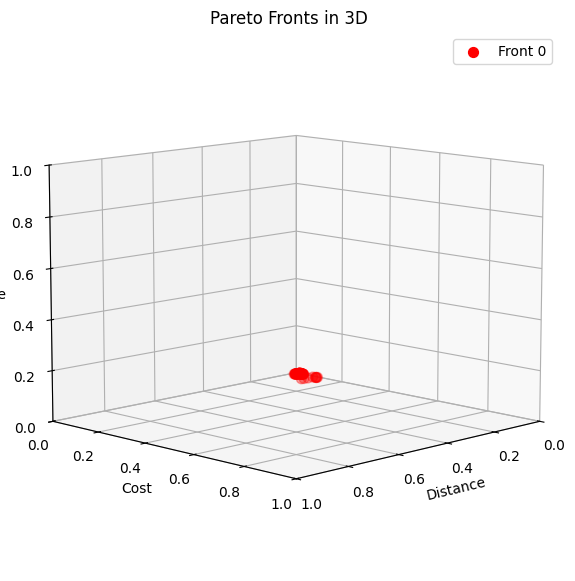

    66 |    32999 |     95 |  0.0015697514 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.007682 0.018497 0.000008]
 [0.009871 0.098598 0.      ]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001009 0.018506 0.002342]
 [0.019302 0.013334 0.00001 ]
 [0.009832 0.014568 0.000015]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.004013 0.015798 0.000078]
 [0.002755 0.016441 0.000026]
 [0.013027 0.01509  0.00001 ]
 [0.004386 0.016043 0.000025]
 [0.019258 0.013511 0.00001 ]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.004217 0.017089 0.0

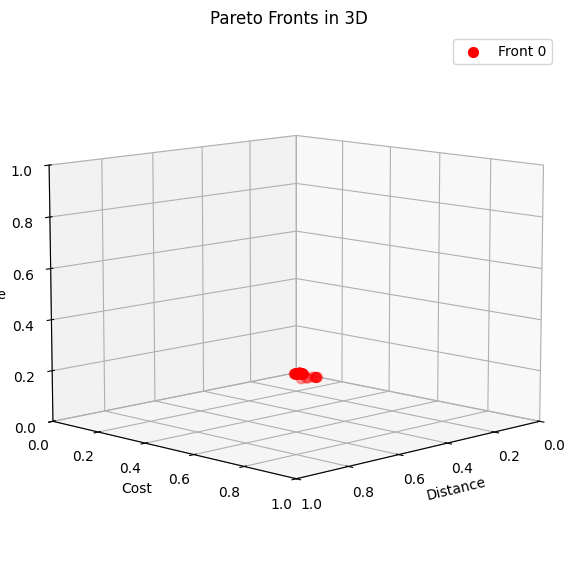

    67 |    33499 |     97 |  0.0020329080 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.010013 0.09599  0.      ]
 [0.013228 0.014321 0.000027]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.009871 0.098598 0.      ]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001009 0.018506 0.002342]
 [0.019302 0.013334 0.00001 ]
 [0.009832 0.014568 0.000015]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.004013 0.015798 0.000078]
 [0.002755 0.016441 0.000026]
 [0.013027 0.01509  0.00001 ]
 [0.004386 0.016043 0.000025]
 [0.019258 0.013511 0.00001 ]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.004217 0.017089 0.000013]
 [0.001822 0.0253   0.0

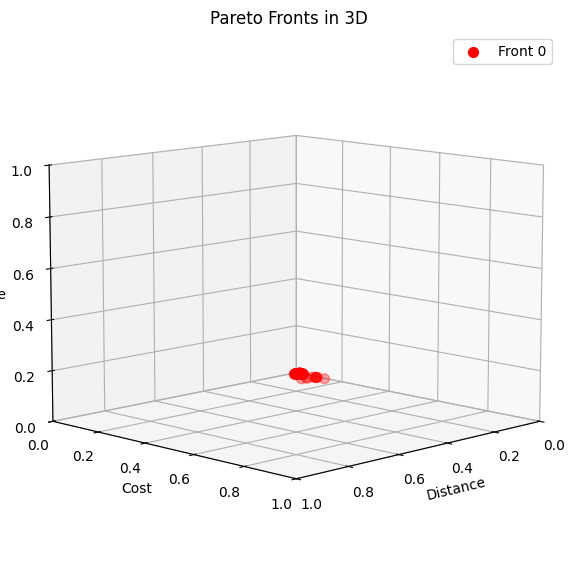

    68 |    33999 |     92 |  0.0022792965 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001009 0.018506 0.002342]
 [0.009832 0.014568 0.000015]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.004013 0.015798 0.000078]
 [0.002755 0.016441 0.000026]
 [0.004386 0.016043 0.000025]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.004217 0.017089 0.000013]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.0

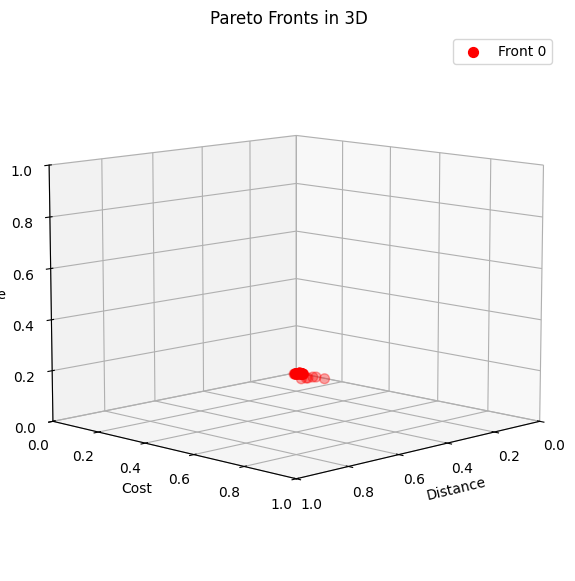

    69 |    34499 |    101 |  0.0025290135 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001009 0.018506 0.002342]
 [0.009832 0.014568 0.000015]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.004013 0.015798 0.000078]
 [0.002755 0.016441 0.000026]
 [0.004386 0.016043 0.000025]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.004217 0.017089 0.000013]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.0

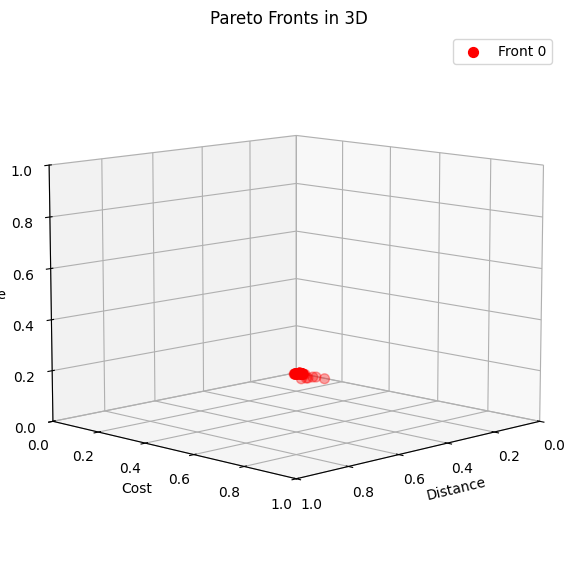

    70 |    34999 |     98 |  0.0002325560 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001009 0.018506 0.002342]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.004013 0.015798 0.000078]
 [0.002755 0.016441 0.000026]
 [0.004386 0.016043 0.000025]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.004217 0.017089 0.000013]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.000024]
 [0.00263  0.017148 0.0

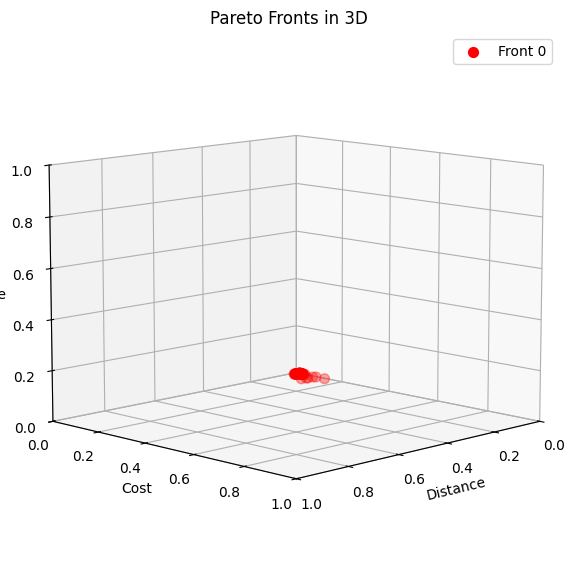

    71 |    35499 |    101 |  0.0004846017 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.002687 0.016869 0.000024]
 [0.002741 0.022782 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001009 0.018506 0.002342]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.004013 0.015798 0.000078]
 [0.002755 0.016441 0.000026]
 [0.004386 0.016043 0.000025]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.004217 0.017089 0.000013]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.000024]
 [0.00263  0.017148 0.0

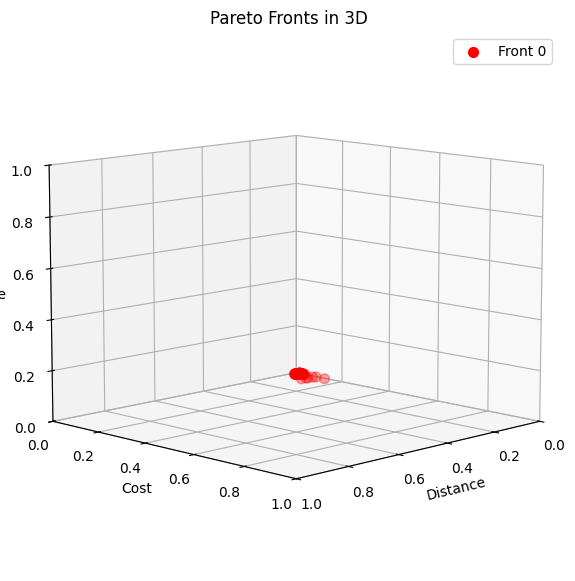

    72 |    35999 |     98 |  0.0009022806 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.033464 0.084724 0.      ]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.004386 0.016043 0.000025]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.000024]
 [0.006627 0.014867 0.000013]
 [0.005028 0.015147 0.00001 ]
 [0.00909  0.014195 0.00003 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.007724 0.024344 0.0

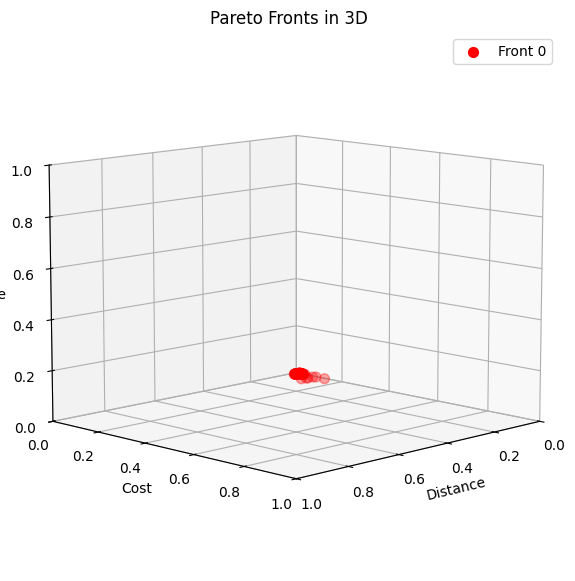

    73 |    36499 |    100 |  0.0016200238 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001533 0.029283 0.000014]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.004386 0.016043 0.000025]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.000024]
 [0.006627 0.014867 0.000013]
 [0.005028 0.015147 0.00001 ]
 [0.00909  0.014195 0.00003 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.007724 0.024344 0.000007]
 [0.008793 0.014565 0.0

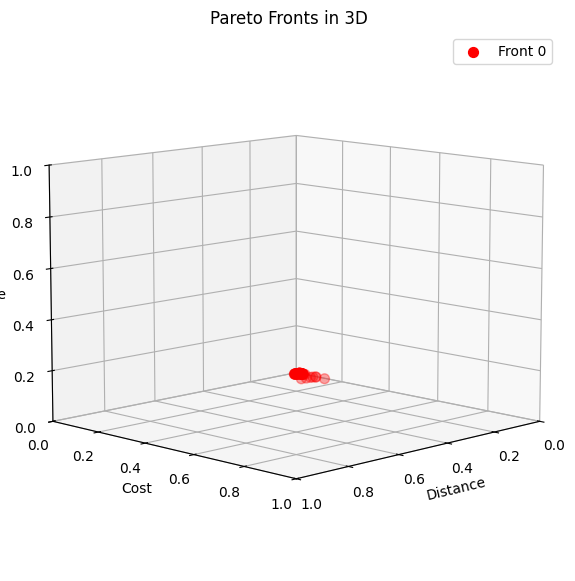

    74 |    36999 |    104 |  0.0017388536 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.004386 0.016043 0.000025]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.000024]
 [0.006627 0.014867 0.000013]
 [0.005028 0.015147 0.00001 ]
 [0.00909  0.014195 0.00003 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.007724 0.024344 0.000007]
 [0.008793 0.014565 0.00002 ]
 [0.017686 0.012923 0.0

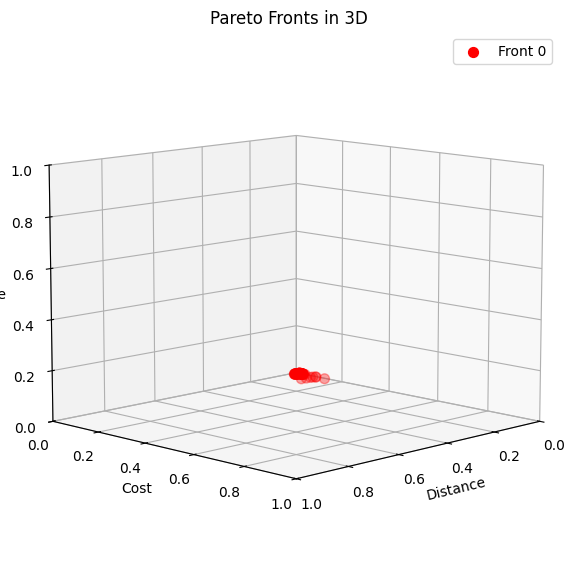

    75 |    37499 |    104 |  0.0019378650 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.000024]
 [0.006627 0.014867 0.000013]
 [0.005028 0.015147 0.00001 ]
 [0.00909  0.014195 0.00003 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.007724 0.024344 0.000007]
 [0.008793 0.014565 0.00002 ]
 [0.017686 0.012923 0.000408]
 [0.001369 0.033186 0.0

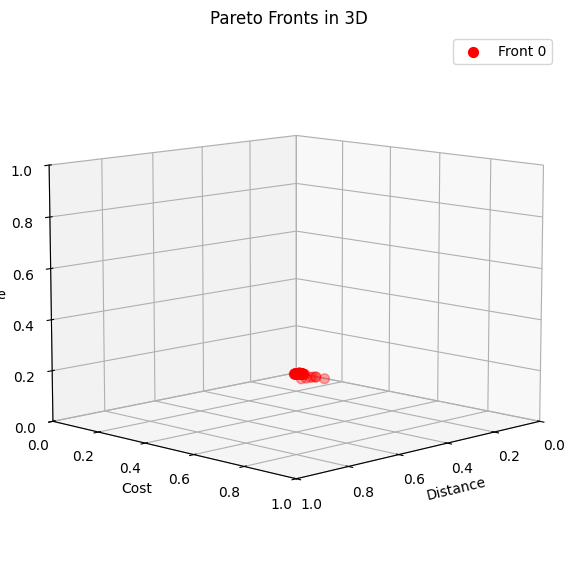

    76 |    37999 |    106 |  0.0020123089 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.000024]
 [0.006627 0.014867 0.000013]
 [0.005028 0.015147 0.00001 ]
 [0.00909  0.014195 0.00003 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.007724 0.024344 0.000007]
 [0.008793 0.014565 0.00002 ]
 [0.017686 0.012923 0.000408]
 [0.001369 0.033186 0.0

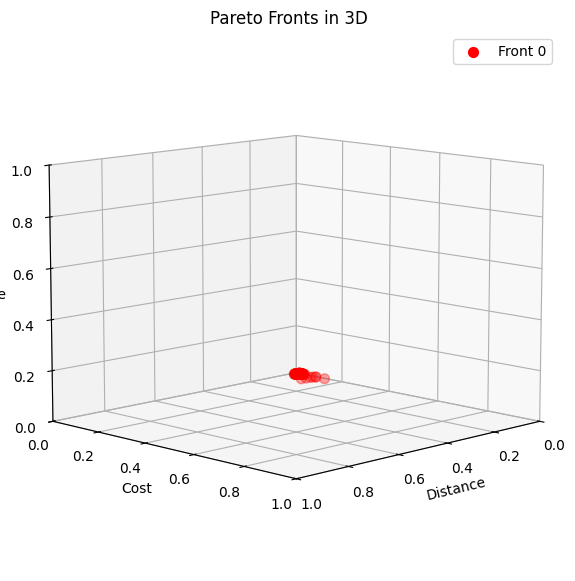

    77 |    38499 |    113 |  0.0022462015 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.017697 0.013064 0.000017]
 [0.001813 0.025914 0.000015]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.000024]
 [0.006627 0.014867 0.000013]
 [0.005028 0.015147 0.00001 ]
 [0.00909  0.014195 0.00003 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.007724 0.024344 0.000007]
 [0.008793 0.014565 0.00002 ]
 [0.017686 0.012923 0.000408]
 [0.001369 0.033186 0.0

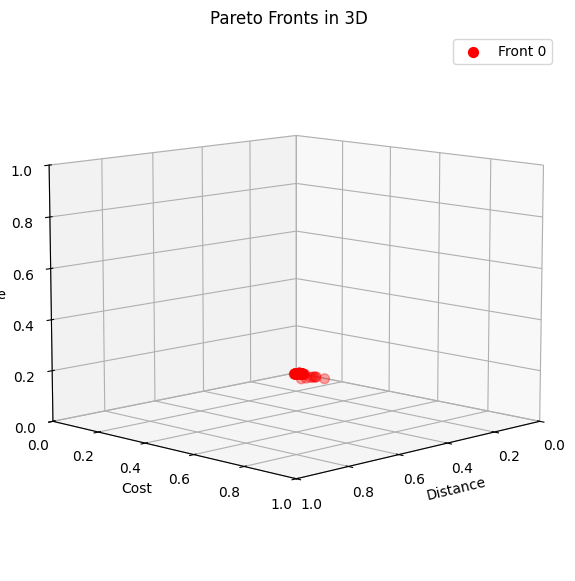

    78 |    38999 |    113 |  0.0023109321 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.001813 0.025914 0.000015]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.00738  0.02558  0.000006]
 [0.005513 0.014916 0.000024]
 [0.006627 0.014867 0.000013]
 [0.005028 0.015147 0.00001 ]
 [0.00909  0.014195 0.00003 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.007724 0.024344 0.000007]
 [0.008793 0.014565 0.00002 ]
 [0.001369 0.033186 0.000017]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.0

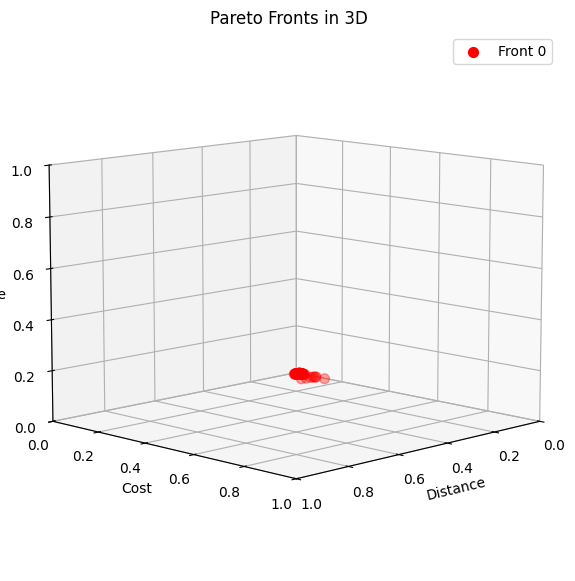

    79 |    39499 |    108 |  0.0023314734 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.001813 0.025914 0.000015]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.002067 0.024322 0.000015]
 [0.005513 0.014916 0.000024]
 [0.006627 0.014867 0.000013]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001369 0.033186 0.000017]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.013552 0.013528 0.000011]
 [0.012534 0.08514  0.      ]
 [0.001759 0.017658 0.000026]
 [0.002338 0.022941 0.0

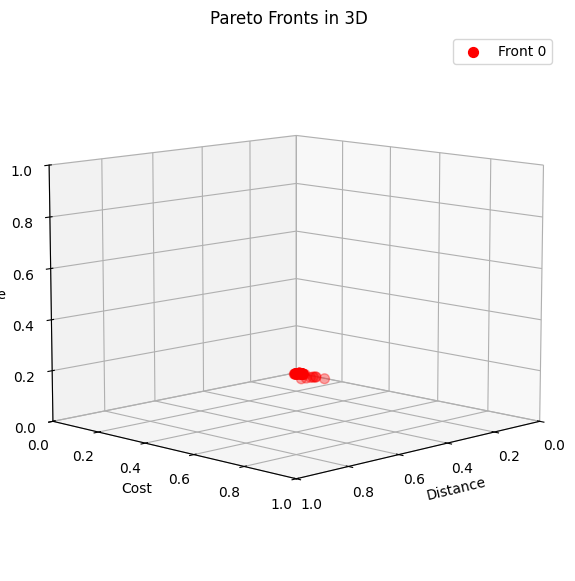

    80 |    39999 |    108 |  0.0023298114 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.006618 0.014639 0.000024]
 [0.001367 0.018752 0.000029]
 [0.005513 0.014916 0.000024]
 [0.006627 0.014867 0.000013]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001369 0.033186 0.000017]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.013552 0.013528 0.000011]
 [0.012534 0.08514  0.      ]
 [0.001759 0.017658 0.000026]
 [0.002338 0.022941 0.00001 ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.0

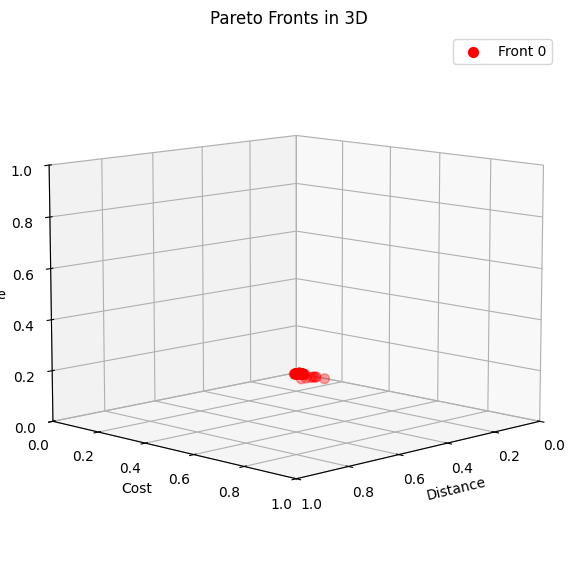

    81 |    40499 |    107 |  0.0023942563 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.001367 0.018752 0.000029]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001369 0.033186 0.000017]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.013552 0.013528 0.000011]
 [0.012534 0.08514  0.      ]
 [0.001759 0.017658 0.000026]
 [0.002338 0.022941 0.00001 ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.003792 0.014681 0.000096]
 [0.001694 0.029273 0.0

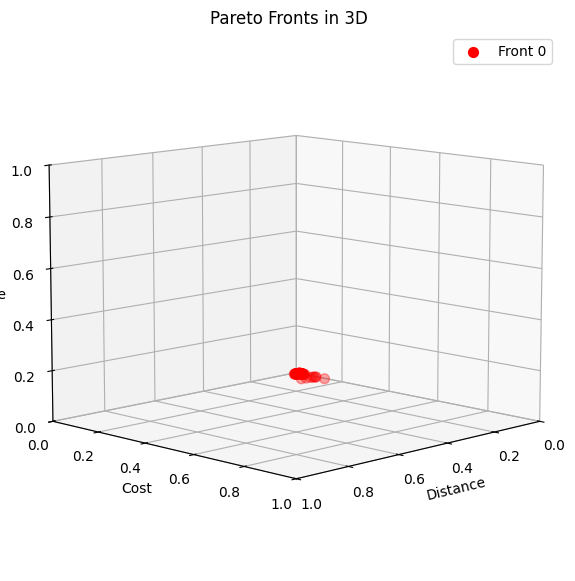

    82 |    40999 |    109 |  0.0025015251 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.001367 0.018752 0.000029]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001369 0.033186 0.000017]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.012534 0.08514  0.      ]
 [0.001759 0.017658 0.000026]
 [0.002338 0.022941 0.00001 ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.003792 0.014681 0.000096]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.0

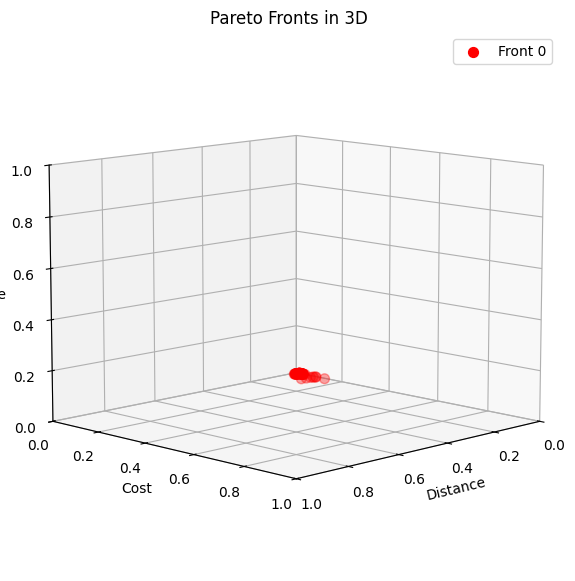

    83 |    41499 |    106 |  0.0002925390 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.004801 0.016379 0.000013]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.001367 0.018752 0.000029]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001369 0.033186 0.000017]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.012534 0.08514  0.      ]
 [0.001759 0.017658 0.000026]
 [0.002338 0.022941 0.00001 ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.0

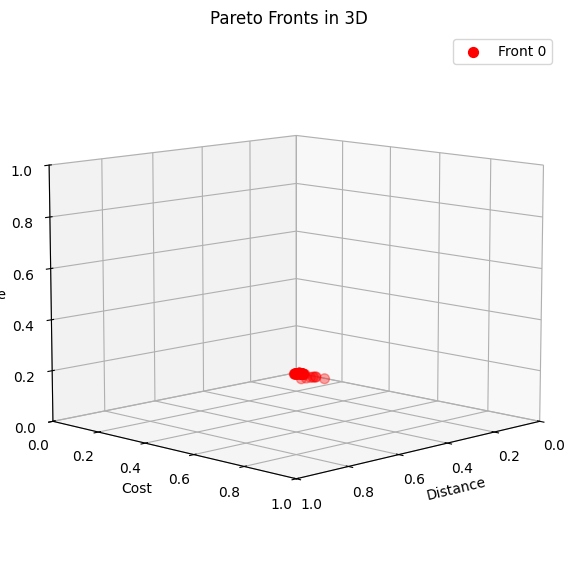

    84 |    41999 |    108 |  0.0005987822 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.001367 0.018752 0.000029]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001369 0.033186 0.000017]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.012534 0.08514  0.      ]
 [0.001759 0.017658 0.000026]
 [0.002338 0.022941 0.00001 ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.0

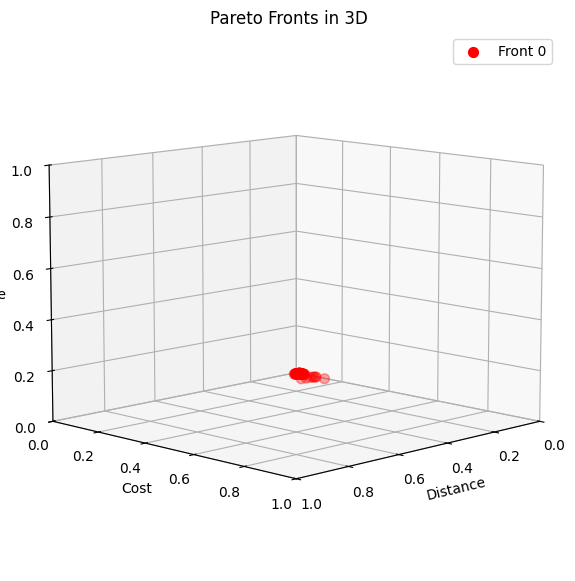

    85 |    42499 |    100 |  0.0006101988 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001502 0.018144 0.000029]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.001396 0.033106 0.000017]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.001367 0.018752 0.000029]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001369 0.033186 0.000017]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.012534 0.08514  0.      ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003291 0.02912  0.000008]
 [0.003268 0.026392 0.0

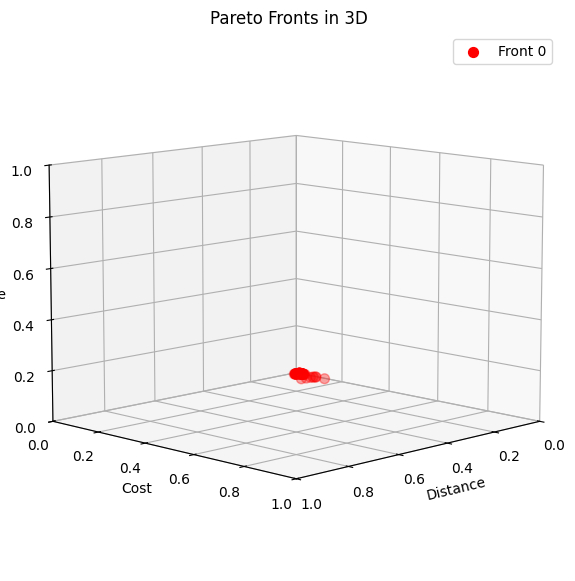

    86 |    42999 |     97 |  0.0008809906 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.012534 0.08514  0.      ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003291 0.02912  0.000008]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.001941 0.017871 0.000019]
 [0.008844 0.015917 0.0

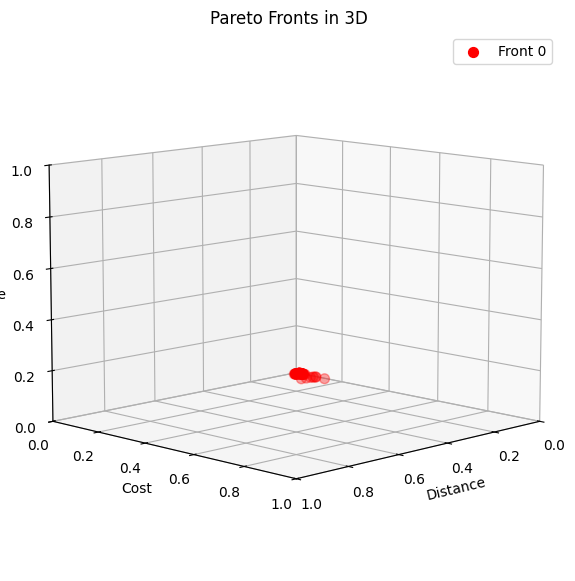

    87 |    43499 |    101 |  0.0009470732 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.012534 0.08514  0.      ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003291 0.02912  0.000008]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.001941 0.017871 0.000019]
 [0.008844 0.015917 0.0

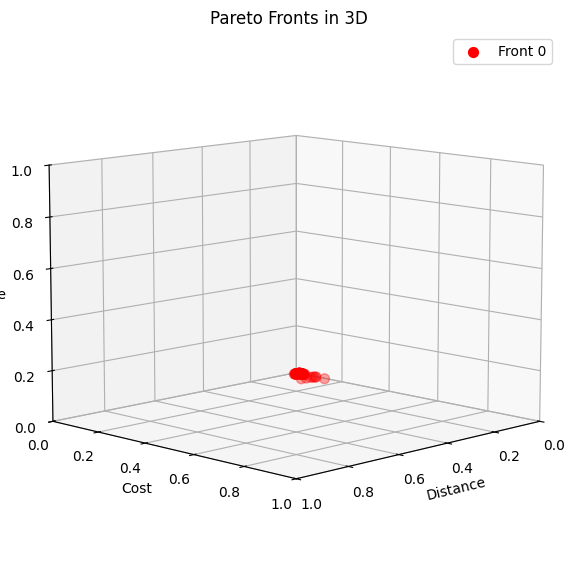

    88 |    43999 |    103 |  0.0010183436 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.002755 0.016441 0.000026]
 [0.001306 0.018652 0.000033]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.012534 0.08514  0.      ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003291 0.02912  0.000008]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.001941 0.017871 0.000019]
 [0.008844 0.015917 0.0

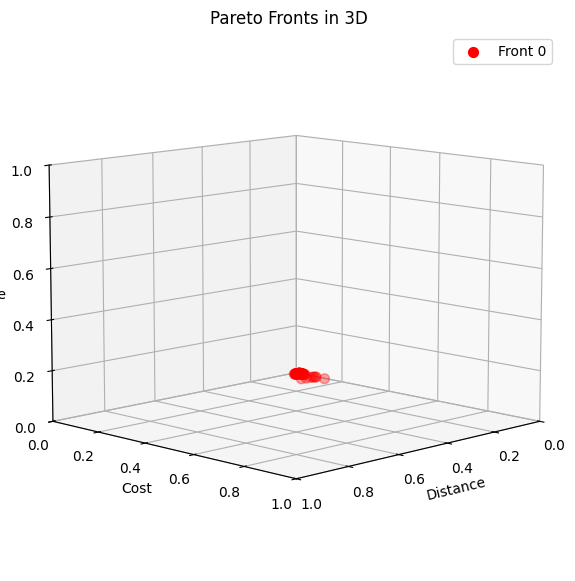

    89 |    44499 |    103 |  0.0011509452 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.002755 0.016441 0.000026]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.012534 0.08514  0.      ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003291 0.02912  0.000008]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.008844 0.015917 0.000006]
 [0.004813 0.016737 0.000008]
 [0.005631 0.014714 0.0

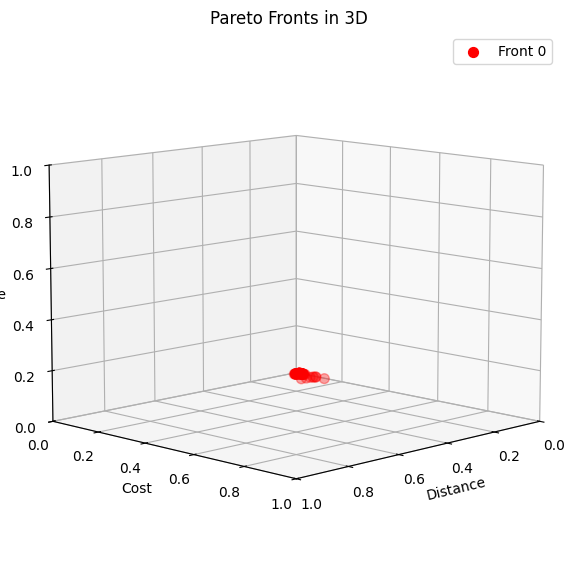

    90 |    44999 |    105 |  0.0012127863 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.005479 0.015134 0.000013]
 [0.002755 0.016441 0.000026]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.004951 0.015307 0.000015]
 [0.012534 0.08514  0.      ]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003291 0.02912  0.000008]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.008844 0.015917 0.000006]
 [0.004813 0.016737 0.000008]
 [0.005631 0.014714 0.0

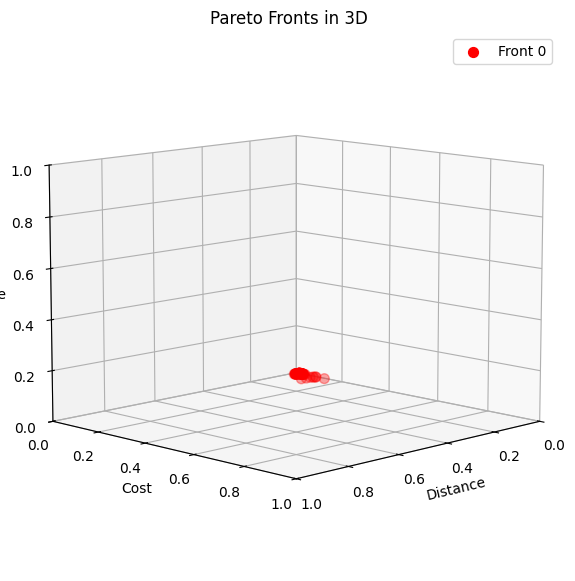

    91 |    45499 |    107 |  0.0019521397 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.002755 0.016441 0.000026]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003291 0.02912  0.000008]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.008844 0.015917 0.000006]
 [0.004813 0.016737 0.000008]
 [0.005631 0.014714 0.000024]
 [0.016678 0.0132   0.000008]
 [0.005176 0.092125 0.      ]
 [0.001201 0.040431 0.0

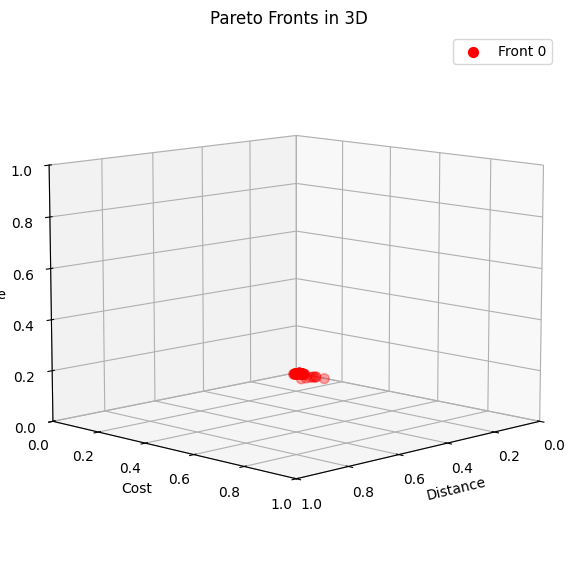

    92 |    45999 |    110 |  0.0025289195 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005513 0.014916 0.000024]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.008844 0.015917 0.000006]
 [0.004813 0.016737 0.000008]
 [0.005631 0.014714 0.000024]
 [0.016678 0.0132   0.000008]
 [0.005176 0.092125 0.      ]
 [0.001201 0.040431 0.000014]
 [0.000959 0.01758  0.000116]
 [0.002448 0.016699 0.0

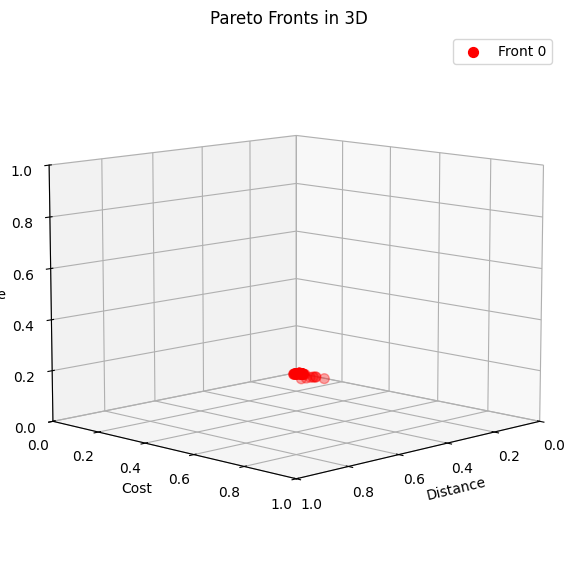

    93 |    46499 |    111 |  0.0003720762 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.008844 0.015917 0.000006]
 [0.004813 0.016737 0.000008]
 [0.016678 0.0132   0.000008]
 [0.005176 0.092125 0.      ]
 [0.001201 0.040431 0.000014]
 [0.000959 0.01758  0.000116]
 [0.002448 0.016699 0.000013]
 [0.014668 0.013732 0.000008]
 [0.005455 0.090705 0. 

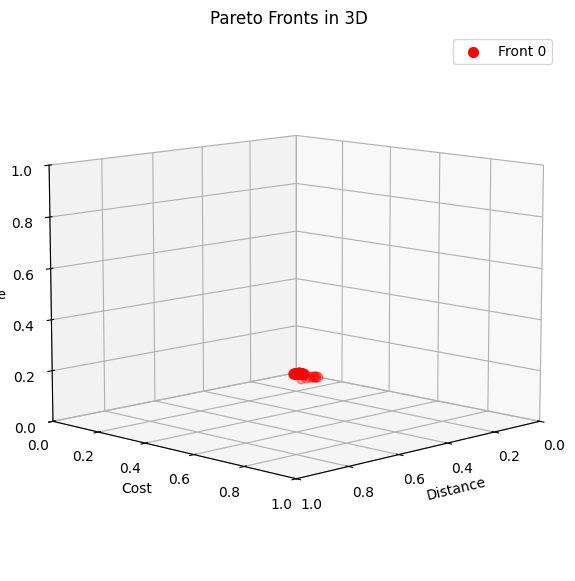

    94 |    46999 |    114 |  0.0008868550 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.008844 0.015917 0.000006]
 [0.004813 0.016737 0.000008]
 [0.016678 0.0132   0.000008]
 [0.005176 0.092125 0.      ]
 [0.001201 0.040431 0.000014]
 [0.000959 0.01758  0.000116]
 [0.002448 0.016699 0.000013]
 [0.014668 0.013732 0.000008]
 [0.005455 0.090705 0. 

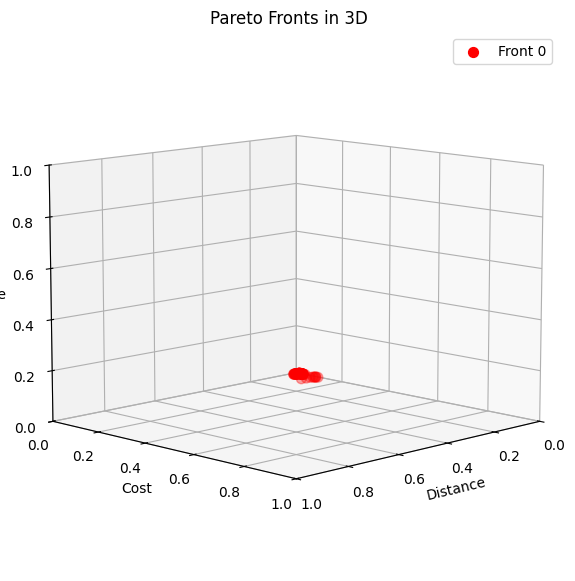

    95 |    47499 |    116 |  0.0010622617 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.004813 0.016737 0.000008]
 [0.016678 0.0132   0.000008]
 [0.005176 0.092125 0.      ]
 [0.001201 0.040431 0.000014]
 [0.000959 0.01758  0.000116]
 [0.002448 0.016699 0.000013]
 [0.014668 0.013732 0.000008]
 [0.005455 0.090705 0.      ]
 [0.005103 0.014116 0.0

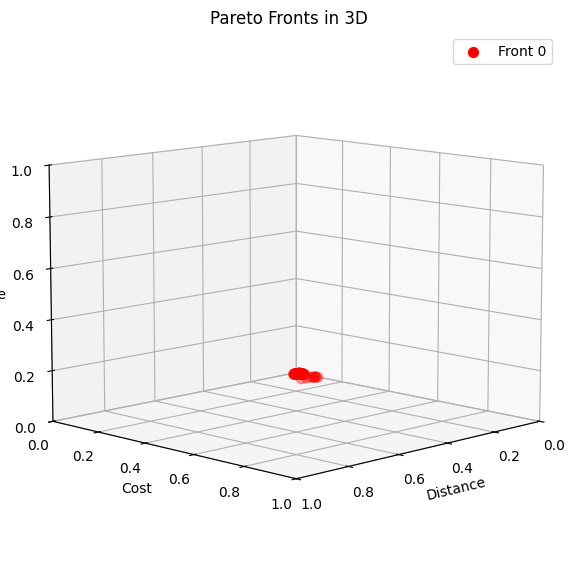

    96 |    47999 |    117 |  0.0013750637 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005028 0.015147 0.00001 ]
 [0.001686 0.026171 0.00002 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.004813 0.016737 0.000008]
 [0.016678 0.0132   0.000008]
 [0.005176 0.092125 0.      ]
 [0.001201 0.040431 0.000014]
 [0.000959 0.01758  0.000116]
 [0.002448 0.016699 0.000013]
 [0.014668 0.013732 0.000008]
 [0.005455 0.090705 0.      ]
 [0.005103 0.014116 0.0

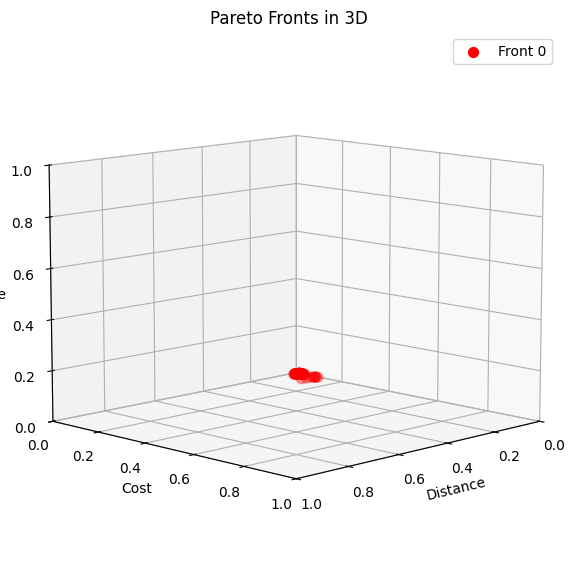

    97 |    48499 |    106 |  0.0020025978 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005028 0.015147 0.00001 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.004813 0.016737 0.000008]
 [0.005176 0.092125 0.      ]
 [0.001201 0.040431 0.000014]
 [0.000959 0.01758  0.000116]
 [0.002448 0.016699 0.000013]
 [0.005455 0.090705 0.      ]
 [0.005103 0.014116 0.000043]
 [0.002777 0.016132 0.000046]
 [0.002881 0.015758 0.000022]
 [0.015987 0.013814 0.0

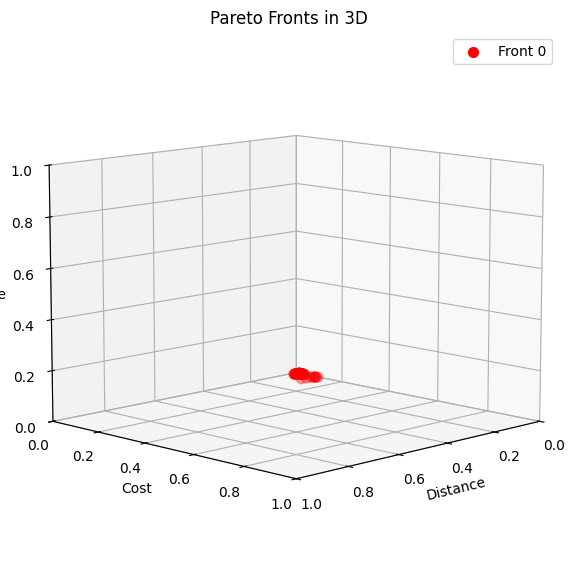

    98 |    48999 |    100 |  0.0020708871 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005028 0.015147 0.00001 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.000959 0.01758  0.000116]
 [0.002448 0.016699 0.000013]
 [0.005455 0.090705 0.      ]
 [0.005103 0.014116 0.000043]
 [0.002777 0.016132 0.000046]
 [0.002881 0.015758 0.000022]
 [0.015987 0.013814 0.000006]
 [0.011401 0.089141 0.      ]
 [0.003613 0.018647 0.000012]
 [0.002871 0.016499 0.0

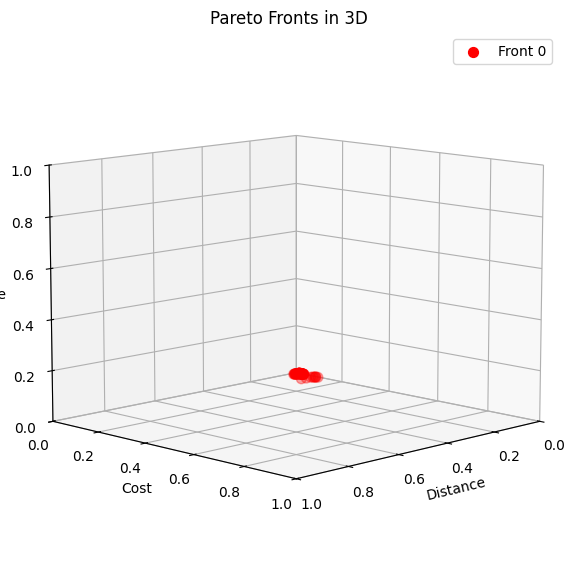

    99 |    49499 |    104 |  0.0021192123 |             f
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005028 0.015147 0.00001 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.056948 0.079005 0.      ]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.000959 0.01758  0.000116]
 [0.002448 0.016699 0.000013]
 [0.005455 0.090705 0.      ]
 [0.005103 0.014116 0.000043]
 [0.002777 0.016132 0.000046]
 [0.002881 0.015758 0.000022]
 [0.015987 0.013814 0.000006]
 [0.011401 0.089141 0.      ]
 [0.003613 0.018647 0.000012]
 [0.002871 0.016499 0.0

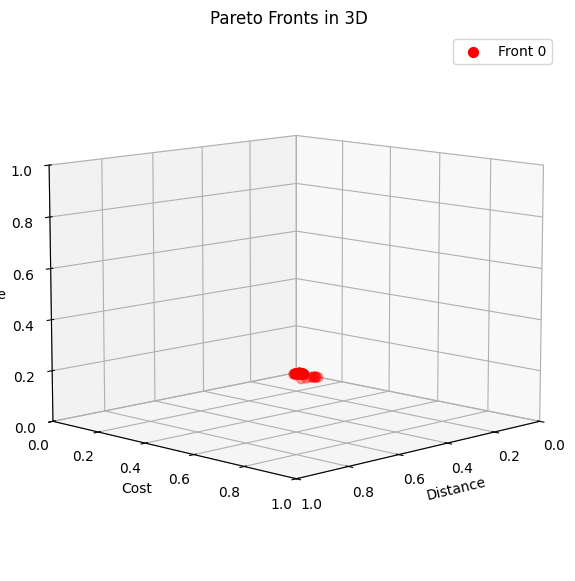

   100 |    49999 |    109 |  0.4165816771 |         nadir
len front_points: [[0.       1.385514 0.130665]
 [0.       1.215164 0.16985 ]
 [0.       1.533151 0.121577]
 [0.001787 0.031196 0.000009]
 [0.001216 0.017564 0.000119]
 [0.001192 0.027734 0.000023]
 [0.001905 0.030013 0.000009]
 [0.001822 0.0253   0.000011]
 [0.00201  0.017609 0.000017]
 [0.005028 0.015147 0.00001 ]
 [0.00199  0.030215 0.000007]
 [0.001307 0.024068 0.000023]
 [0.002285 0.017208 0.000015]
 [0.001694 0.029273 0.00001 ]
 [0.004843 0.015756 0.00001 ]
 [0.003069 0.016342 0.000014]
 [0.001134 0.016868 0.002124]
 [0.003268 0.026392 0.000009]
 [0.038675 0.082397 0.      ]
 [0.001517 0.03192  0.000012]
 [0.000959 0.01758  0.000116]
 [0.002448 0.016699 0.000013]
 [0.005455 0.090705 0.      ]
 [0.005103 0.014116 0.000043]
 [0.002777 0.016132 0.000046]
 [0.002881 0.015758 0.000022]
 [0.015987 0.013814 0.000006]
 [0.011401 0.089141 0.      ]
 [0.003613 0.018647 0.000012]
 [0.002871 0.016499 0.000015]
 [0.003137 0.01576  0.0

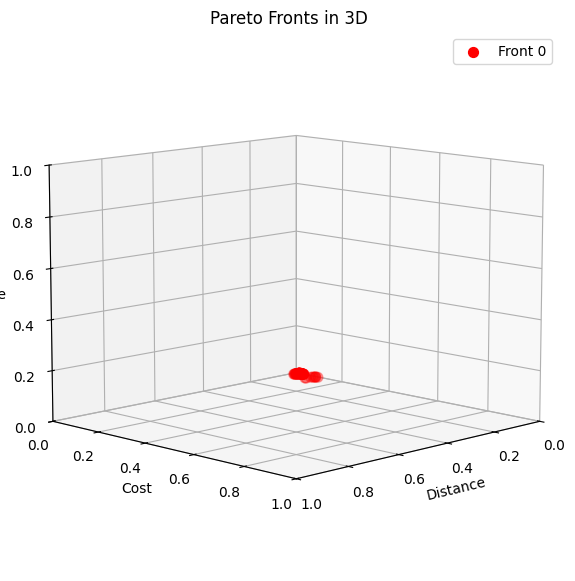

In [30]:
import random
import numpy as np
import folium
import matplotlib.pyplot as plt
import math
import ast
import plotly.graph_objects as go

from os import replace
from pymoo.core.crossover import Crossover
from pymoo.core.problem import Problem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.population import Population
from pymoo.core.crossover import Crossover
from pymoo.operators.selection.rnd  import RandomSelection
from pymoo.core.sampling import Sampling
from geopy.distance import geodesic
from geopy.geocoders import ArcGIS
from geopy.geocoders import Nominatim
from pymoo.core.callback import Callback
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.core.selection import Selection
from pymoo.visualization.scatter import Scatter
from pymoo.core.mutation import Mutation
from mpl_toolkits import mplot3d
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from mpl_toolkits.mplot3d import Axes3D
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.util.dominator import Dominator
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from pymoo.termination.xtol import DesignSpaceTermination
from pymoo.termination.robust import RobustTermination
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pymoo.util.dominator import Dominator
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from pymoo.core.survival import Survival
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.operators.survival.rank_and_crowding import RankAndCrowding
from scipy.spatial.distance import pdist
from pymoo.indicators.gd import GD
from pymoo.indicators.hv import HV

def repairSolution(solution, n_var):
   solution = [int(row) for row in solution]

   sample = np.zeros(n_var)


   if(solution[0] != 0):

        length = solution[0] * GeneticAlgorithmConfig.timePlaceMappingSize
        head, interior, tail = getSliceRoute(solution)
        uniqueList = []

        for i in range(0, len(interior),GeneticAlgorithmConfig.timePlaceMappingSize):

          if(interior[i] not in uniqueList):
            for j in range(i, i+GeneticAlgorithmConfig.timePlaceMappingSize, 1):
              uniqueList.append(interior[j])
        lengthSolution = int((len(uniqueList) // GeneticAlgorithmConfig.timePlaceMappingSize))

        uniqueList = [lengthSolution] + head + uniqueList + tail
        return uniqueList

   else:
      return solution


def isValidSolution(solution):
   solution = [int(row) for row in solution]
   return True



def createSolution(n_var):
    hotel = locations[locations["type"] == "hotel"].sample(n=1)
    hotelId = hotel["Id"].values[0]

    sample = [-1 for _ in range(n_var)]
    rand = random.randint(0, GeneticAlgorithmConfig.totalRouteSize)
    time = 8
    if(userPreference["Resort"] == 5):
      time = 16
    currentLocationSize = rand
    start = GeneticAlgorithmConfig.totalLocationSize + (GeneticAlgorithmConfig.hotelSize * GeneticAlgorithmConfig.timePlaceMappingSize)
    end = (start + (rand * GeneticAlgorithmConfig.timePlaceMappingSize))
    sample[0] = currentLocationSize
    sample[1] = hotelId
    sample[2] = time
    sample[end] = hotelId
    sample[end+1] = time
    for i in range(start, end, GeneticAlgorithmConfig.timePlaceMappingSize):
      location = locations[locations["type"] != "hotel"].sample(n=1)
      sample[i] = location["Id"].values[0]
      time = np.random.randint(1, 8)
      sample[i+1] = time


    return sample

n_obj = 3
best_per_generation = []  # لیستی برای هر تابع هدف



class CustomeCallback(Callback):
    global true_pf
    def __init__(self, n_obj):
        super().__init__()
        self.n_obj = n_obj
        self.pareto_fronts = []


    def notify(self, algorithm):
        F = algorithm.pop.get("F")  # دریافت مقدار Fitness
        X = algorithm.pop.get("X")

        if(algorithm.n_gen == 1):
           GeneticAlgorithmConfig.best = []
           GeneticAlgorithmConfig.cost_variance = []
           GeneticAlgorithmConfig.distance_variance = []
           GeneticAlgorithmConfig.rate_variance = []

           GeneticAlgorithmConfig.distance_diversity = []
           GeneticAlgorithmConfig.cost_diversity = []
           GeneticAlgorithmConfig.rate_diversity = []
           GeneticAlgorithmConfig.GD = []
           GeneticAlgorithmConfig.HV = []
           F = algorithm.pop.get("F")

           GeneticAlgorithmConfig.ref_points =  np.max(F, axis=0)
           GeneticAlgorithmConfig.cd = []
           GeneticAlgorithmConfig.mpd_decision = []
           GeneticAlgorithmConfig.mpd_objective = []

        GeneticAlgorithmConfig.number_genrations = algorithm.n_gen

        crowding = algorithm.pop.get("crowding")


        # self.pareto_fronts.append(F)

        # # ایجاد یا به‌روزرسانی نمودار سه‌بعدی
        # plt.clf()  # پاک کردن نمودار قبلی
        # fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')  # محور سه‌بعدی

        # # رسم نقاط جبهه پارتو
        # ax.scatter(F[:, 0], F[:, 1], F[:, 2], color='blue', label=f"Generation {algorithm.n_gen}")

        # # تنظیم برچسب‌ها و عنوان
        # ax.set_title(f"Pareto Front - Generation {algorithm.n_gen}")
        # ax.set_xlabel("f1")
        # ax.set_ylabel("f2")
        # ax.set_zlabel("f3")
        # ax.legend()

        # plt.pause(0.1)  # مکث کوتاه برای نمایش
        # for sample in X:
        #    print(sample[0:(sample[0] * 2) + 5])
        # print('-------------------------')

        if algorithm.pop is not None:



            # pareto_solutions = [X[idx] for idx in pareto_indices]
            colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']



            # pareto_fronts = fast_non_dominated_sort(F)
            # F = algorithm.pop.get("F")
            # pareto_indices = NonDominatedSorting().do(F, only_non_dominated_front=True)
            # pf = F[pareto_indices]
            # gd_indicator = GD(F)
            # gd = gd_indicator(np.vstack(pf))
            # print(gd)
            # GeneticAlgorithmConfig.GD.append(gd)

            # ref_point = np.array([0.0, 0.0, 0.0])
            # ind = HV(ref_point=ref_point)
            # hv = ind(np.vstack(pf))
            # print(hv)

            # GeneticAlgorithmConfig.HV.append(hv)
            F = algorithm.pop.get("F")
            pareto_indices = NonDominatedSorting().do(F, only_non_dominated_front=False)







            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')

            colors = ['r', 'g', 'b', 'c', 'm', 'y']




            for i, front in enumerate(pareto_indices):
                if(i == 0):
                  # print(f"pareto front {i}")
                  front_indices = np.array(front, dtype=int)  # تبدیل لیست ایندکس‌ها به آرایه صحیح
                  front_points = F[front_indices]  # مقدارهای تابع هدف در جبهه پارتو
                  print(f"len front_points: {front_points}")
                  solution_points = X[front_indices]
                  sums = list(map(sum, zip(front_points[:, 0], front_points[:, 1], front_points[:, 2])))

                  GeneticAlgorithmConfig.best.append(min(sums))
                  GeneticAlgorithmConfig.distance_variance.append(np.std(front_points[:, 0]))
                  GeneticAlgorithmConfig.cost_variance.append(np.std(front_points[:, 1]))
                  GeneticAlgorithmConfig.rate_variance.append(np.std(front_points[:, 2]))
                  # GeneticAlgorithmConfig.cd.append(np.mean(crowding[front_points]))
                  # GeneticAlgorithmConfig.mpd_decision.append(np.mean(pdist(X, metric='euclidean')))
                  GeneticAlgorithmConfig.mpd_decision.append(meanPairwiseDistance(solution_points))
                  GeneticAlgorithmConfig.mpd_objective.append(np.mean(pdist(front_points, metric='euclidean')))
                  # print(front_points)
                  # for solution in solution_point:
                  #   print(solution[0:(solution[0]*2)+5])
                  #   print('----------------------------------')
                  # print('--------------------------')
                  ax.scatter(front_points[:, 0], front_points[:, 1], front_points[:, 2],
                            color=colors[i % len(colors)], label=f'Front {i}', s=50)


            ax.set_xlim3d(0, 1)
            ax.set_ylim3d(0, 1)
            ax.set_zlim3d(0, 1)
            ax.view_init(elev=10, azim=45)
            ax.set_title("Pareto Fronts in 3D")
            ax.set_xlabel("Distance")
            ax.set_ylabel("Cost")
            ax.set_zlabel("Rate")
            ax.set_title('Pareto Fronts in 3D')
            ax.legend()
            plt.show()
            # fig = plt.figure(figsize=(10, 10))
            # ax = fig.add_subplot(111, projection='3d')
            # for i, pareto in enumerate(pareto_fronts):
            #       ax.scatter(pareto[:, 0], pareto[:, 1], abs(pareto[:, 2]))





            # ax.view_init(elev=10, azim=45)
            # ax.set_title("Pareto Fronts in 3D")
            # ax.set_xlabel("Distance")
            # ax.set_ylabel("Cost")
            # ax.set_zlabel("Rate")
            # ax.set_xlim3d(0, 1)
            # ax.set_ylim3d(0, 1)
            # ax.set_zlim3d(0, 1)
            # # # حذف تکرار لیبل‌های رنگی
            # handles, labels = plt.gca().get_legend_handles_labels()
            # by_label = dict(zip(labels, handles))
            # plt.legend(by_label.values(), by_label.keys(), loc='upper left')

            # # # نمایش نمودار
            # plt.show()
            # format_func = np.vectorize(lambda x: "%.6f" % x)
            # # اعمال فرمت‌دهی روی ماتریس
            # formatted_matrix = format_func(F)

            # print(formatted_matrix)


            # # نمایش دسته‌بندی‌ها
            # for i, front in enumerate(pareto_fronts):
            #     if(i == 0):
            #       print(f"Pareto Front {i+1}:")
            #       print(f"index:{i+1}, {front}")
            # print('------------------------------')



            # for i, solutions in enumerate(pareto_solutions):
            #     if(i == 0):
            #       print(f"solution {i+1}:")
            #       count_route, total_distance, total_cost, total_rate = getSingleObjective(solutions,
            #                                                                                GeneticAlgorithmConfig.preference)

            #       for i in range(len(total_distance)):
            #          print(f"{count_route[i]}->({total_distance[i]}, {total_cost[i]}, {total_rate[i]})")

            # print('-------------------------')




            # print('//////////////////////////////////////////////')



class CustomMutation(Mutation):
    def __init__(self, change_rate=0.06, swap_rate=0.06, new_rate=0.06):
        super().__init__()
        self.change_rate = change_rate  # احتمال جهش
        self.swap_rate = swap_rate
        self.new_rate  = new_rate

    def _do(self, problem, X, **kwargs):
        X_mutated = X.copy()
        n, d = X.shape  # تعداد کروموزوم‌ها و متغیرها

        for i in range(n):

            if (np.random.rand() < self.change_rate):
                if X_mutated[i, 0] > 2:
                  j = np.random.randint(2, X_mutated[i, 0])  # انتخاب یک ژن تصادفی برای تغییر
                  if(j % 2 == 0):
                    j += 1
                  old = X_mutated[i, j]
                  X_mutated[i, j] = getLocation()
                  time = np.random.randint(1, 8)
                  X_mutated[i, j+1] = time
                  new = X_mutated[i, j]
                  # print(f"{old} -> {new}")
                  # print('------------------------')
            if(np.random.rand() < self.swap_rate):
                head, interior, tail = getSliceRoute(X_mutated[i])

                point1 = 0
                point2 = 0
                if(len(interior) > 1):
                   if(len(interior) == 4):

                      point1 = 0
                      point2 = 2
                      temp = interior[point1]
                      temp_time = interior[point1+1]
                      interior[point1] = interior[point2]
                      interior[point1+1] = interior[point2+1]
                      interior[point2] = temp
                      interior[point2+1] = temp_time

                      length = int(len(interior) // GeneticAlgorithmConfig.timePlaceMappingSize)
                      sample = [length] + list(head) + list(interior) + list(tail)
                      for j in range(len(sample)):
                          X_mutated[i, j] = sample[j]

                      # print(f"{interior[point1]} -> {interior[point2]}")
                      # print('------------------------------------')
                   elif(len(interior) > 4):


                      point1 = np.random.randint(0, len(interior)-2)
                      point2 = np.random.randint(0, len(interior)-2)


                      if(point1 % 2 != 0):
                         point1 += 1
                      if(point2 % 2 != 0):
                         point2 += 1
                      temp = interior[point1]
                      temp_time = interior[point1+1]
                      interior[point1] = interior[point2]
                      interior[point1+1] = interior[point2+1]
                      interior[point2] = temp
                      interior[point2+1] = temp_time

                      length = int(len(interior) // GeneticAlgorithmConfig.timePlaceMappingSize)


                      sample = [length] + list(head) + list(interior) + list(tail)
                      for j in range(len(sample)):
                          X_mutated[i, j] = sample[j]


            if(np.random.rand() < self.new_rate):
                  head, interior, tail = getSliceRoute(X_mutated[i])
                  old = X_mutated[i]
                  point = 0
                  newLocation = getLocation()
                  time = np.random.randint(1, 8)
                  if(len(interior) > 1):
                     point = np.random.randint(0, len(interior))
                     if(point % 2 != 0):
                        point += 1
                  interior = list(interior)
                  interior.insert(point, newLocation)
                  interior.insert(point+1, time)
                  length = len(interior) // GeneticAlgorithmConfig.timePlaceMappingSize
                  newRoute = [length] + list(head) + list(interior) + list(tail)
                  newRoute = repairSolution(newRoute, GeneticAlgorithmConfig.n_var)
                  # print(f"old: {old}")
                  # print(f"new: {newRoute}")
                  # print(f"value:{newLocation}, {time}")
                  # print('-----------------------------')
                  for j in range(len(newRoute)):
                      X_mutated[i, j] = newRoute[j]
        return X_mutated



class CustomSampling(Sampling):
    def __init__(self, prefernces, **kwargs):
        self.prefernces = prefernces
        super().__init__(**kwargs)

    def _do(self, problem, n_samples, **kwargs):
        n_var = problem.n_var  # تعداد متغیرها
        xl = problem.xl        # حد پایین متغیرها
        xu = problem.xu        # حد بالا متغیرها
        samples = np.zeros([n_samples, n_var], dtype=int)

        for row in range(len(samples)):
            samples[row] = createSolution(n_var)


        # for sample in samples:
        #    print(sample[0:(sample[0] * 2) + 5])
        # print('-------------------------------')
        return samples






def getObjective(routes, prefernces):
    total_distance = []
    total_cost = []
    total_rate = []
    T = 8 * 4



    for route in routes:

        deltaT = 0
        totalTime = 0
        M = 0
        L = route[0] + 1

        countHotel = 0
        route = route.astype(int)
        distance = 0
        cost = 0
        rate = 0
        averageRate = 0
        startRoute = 1
        endRoute  = (route[0] * GeneticAlgorithmConfig.timePlaceMappingSize) + GeneticAlgorithmConfig.totalLocationSize + (GeneticAlgorithmConfig.hotelSize * 2)


        # calculate distance
        for i in range(startRoute, endRoute, GeneticAlgorithmConfig.timePlaceMappingSize):

            totalTime += route[i + 1]

            start, end = int(route[i]), int(route[i + GeneticAlgorithmConfig.timePlaceMappingSize])
            start = locations[locations["Id"] == start]
            end = locations[locations["Id"] == end]
            start_lat, start_lon = start["Latitude"].values[0], start["Longitude"].values[0]
            end_lat, end_lon = end["Latitude"].values[0], end["Longitude"].values[0]
            distance += np.float64(geodesic((start_lat, start_lon), (end_lat, end_lon)).km)
        if(GeneticAlgorithmConfig.number_genrations == 1):
          if(GeneticAlgorithmConfig.maxDistance < distance):
            GeneticAlgorithmConfig.maxDistance = distance

        detalT = abs(totalTime - T)
        M = L / detalT

        if(M != np.inf):
          distance /= M



        # caculate rate
        for i in range(startRoute,
                       endRoute,
                       GeneticAlgorithmConfig.timePlaceMappingSize):
          averageRate = 0
          node = locations[locations["Id"] == route[i]]

          if(len(node["tag"]) > 0):
            tags = node["tag"].values[0]
            tags = str(tags).replace("[" ,"")
            tags = str(tags).replace("'" ,"")
            tags = str(tags).replace(']', "")
            tags = str(tags).replace(' ', "")
            tags = str(tags).split(',')

            for tag in tags:
              if(tag in prefernces):

                averageRate += node['Stars'].values[0] * prefernces[tag]
            averageRate /=  len(tags)
            rate += route[i+1] * averageRate
        if(GeneticAlgorithmConfig.number_genrations == 1):
          if(GeneticAlgorithmConfig.maxRate < rate):
            GeneticAlgorithmConfig.maxRate = rate
        rate = detalT / rate


        # caculate cost
        for i in range(startRoute,
                       endRoute,
                       GeneticAlgorithmConfig.timePlaceMappingSize):

            node = locations[locations["Id"] == route[i]]
            cost += node["Price"].values[0]
        if(GeneticAlgorithmConfig.number_genrations == 1):
          if(GeneticAlgorithmConfig.maxCost < cost):
            GeneticAlgorithmConfig.maxCost = cost

        if(M != np.inf):
          cost /= M


        total_distance.append(distance)
        total_cost.append(cost)
        total_rate.append(rate)


    for i in range(len(total_distance)):
      total_distance[i] /= GeneticAlgorithmConfig.maxDistance
      total_distance[i] = float(format(total_distance[i], ".6f"))


    for i in range(len(total_cost)):
      total_cost[i] /= GeneticAlgorithmConfig.maxCost
      total_cost[i] = float(format(total_cost[i], ".6f"))


    for i in range(len(total_rate)):
      total_rate[i] /= GeneticAlgorithmConfig.maxRate
      total_rate[i] = float(format(total_rate[i], ".6f"))

    return (total_distance,
            total_cost,
            total_rate)



def getSingleObjective(routes, prefernces):

    total_distance = []
    total_cost = []
    total_rate = []
    count_route = []




    for route in routes:
        count_route.append(route[0])

        deltaT = 0
        totalTime = 0
        M = 0
        L = route[0] + 1

        countHotel = 0
        route = route.astype(int)
        distance = 0
        cost = 0
        rate = 0
        averageRate = 0
        startRoute = 1
        endRoute  = (route[0] * GeneticAlgorithmConfig.timePlaceMappingSize) + GeneticAlgorithmConfig.totalLocationSize + (GeneticAlgorithmConfig.hotelSize * 2)


        # calculate distance
        for i in range(startRoute, endRoute, GeneticAlgorithmConfig.timePlaceMappingSize):

            totalTime += route[i + 1]

            start, end = int(route[i]), int(route[i + GeneticAlgorithmConfig.timePlaceMappingSize])
            start = locations[locations["Id"] == start]
            end = locations[locations["Id"] == end]
            start_lat, start_lon = start["Latitude"].values[0], start["Longitude"].values[0]
            end_lat, end_lon = end["Latitude"].values[0], end["Longitude"].values[0]
            distance += np.float64(geodesic((start_lat, start_lon), (end_lat, end_lon)).km)





        # caculate rate
        for i in range(startRoute,
                       endRoute,
                       GeneticAlgorithmConfig.timePlaceMappingSize):
          averageRate = 0
          node = locations[locations["Id"] == route[i]]

          if(len(node["tag"]) > 0):
            tags = node["tag"].values[0]
            tags = str(tags).replace("[" ,"")
            tags = str(tags).replace("'" ,"")
            tags = str(tags).replace(']', "")
            tags = str(tags).replace(' ', "")
            tags = str(tags).split(',')
            # print(f"tag: {tags}")
            for tag in tags:
                averageRate += node['Stars'].values[0] * prefernces[tag]
            averageRate /= len(tags)
            rate += averageRate
            rate += route[i+1] * averageRate

        # caculate cost
        for i in range(startRoute,
                       endRoute,
                       GeneticAlgorithmConfig.timePlaceMappingSize):

            node = locations[locations["Id"] == route[i]]
            cost += node["Price"].values[0]



        total_distance.append(distance)
        total_cost.append(cost)
        total_rate.append(rate)

    return (count_route,
            total_distance,
            total_cost,
            total_rate)



# مدل و الگوریتم NSGA-II
class HotelRouteProblem(Problem):
    def __init__(self, n_var, prefernces=None):
      self.prefernces = prefernces
      super().__init__(n_var=n_var,
                         n_obj=3,
                         n_constr=0,
                         xl=0,
                         xu=len(locations) - 1)

    def _evaluate(self, x, out, *args, **kwargs):
        total_distance, total_cost, total_rate = getObjective(x, self.prefernces)
        out["F"] = np.column_stack([total_distance, total_cost, total_rate])




class CustomeCrossover(Crossover):
    def __init__(self):


        super().__init__(2,2)

    def _do(self, problem, X, **kwargs):

        _, n_matings, n_var = X.shape
        Y = np.full_like(X, None, dtype=object)

        for k in range(n_matings):
            while True:
              # انتخاب والدین
              parent1 = [int(item) for item in X[0, k]]
              parent2 = [int(item) for item in X[1, k]]

              head1, interior1, tail1 = getSliceRoute(parent1)
              head2, interior2, tail2 = getSliceRoute(parent2)

              point1 = 0
              point2 = 0
              if((len(interior1) // GeneticAlgorithmConfig.timePlaceMappingSize) > 0):
                  point1  = np.random.randint(0, len(interior1) / GeneticAlgorithmConfig.timePlaceMappingSize)

              if((len(interior2) // GeneticAlgorithmConfig.timePlaceMappingSize) > 0):
                point2 = np.random.randint(0, len(interior2) / GeneticAlgorithmConfig.timePlaceMappingSize)




              child1 = interior1[:point1*GeneticAlgorithmConfig.timePlaceMappingSize] + interior2[point2*GeneticAlgorithmConfig.timePlaceMappingSize:]
              child2 = interior2[:point2*GeneticAlgorithmConfig.timePlaceMappingSize] + interior1[point1*GeneticAlgorithmConfig.timePlaceMappingSize:]

              lenChild1 = int(len(child1) // GeneticAlgorithmConfig.timePlaceMappingSize)
              lenChild2 = int(len(child2) // GeneticAlgorithmConfig.timePlaceMappingSize)



              child1 = [lenChild1] + head1 + child1 + tail1
              child2 = [lenChild2] + head2 + child2 + tail2

              # print(f"parent1: {parent1}")
              # print(f"parent2: {parent2}")

              # display(HTML(f"""</span><span style='color:green'>{interior1[:point1*GeneticAlgorithmConfig.timePlaceMappingSize]}</span>
              #   <span style='color:orange'>{interior2[point2*GeneticAlgorithmConfig.timePlaceMappingSize:]}</span>"""))
              # display(HTML(f"""</span><span style='color:orange'>{interior2[:point2*GeneticAlgorithmConfig.timePlaceMappingSize]}</span>
              #   <span style='color:green'>{interior1[point1*GeneticAlgorithmConfig.timePlaceMappingSize:]}</span>"""))
              # print(f"child1: {child1}")
              # print(f"child2: {child2}")
              # print('--------------------------')
              childSample1  = np.zeros(n_var)
              childSample2  = np.zeros(n_var)

              child1 = repairSolution(child1, n_var)
              child2 = repairSolution(child2, n_var)




              for i in range(len(child1)):
                childSample1[i] = child1[i]
              for i in range(len(child2)):
                  childSample2[i] = child2[i]
              break

            # ذخیره فرزندان
            Y[0, k] = childSample1
            Y[1, k] = childSample2

        return Y


n_var = GeneticAlgorithmConfig.n_var





# استفاده از انتخاب تورنمنت
callback = CustomeCallback(n_obj=3)
GeneticAlgorithmConfig.preference = userPreference
algorithm = NSGA2(pop_size=500,
                  sampling=CustomSampling(prefernces=userPreference),
                  crossover=CustomeCrossover(),
                  callback=callback,
                  mutation=CustomMutation(),
                  )



termination = RobustTermination(DesignSpaceTermination(tol=0.01), period=20)

problem = HotelRouteProblem(n_var=n_var, prefernces=userPreference)
res = minimize(problem,
               algorithm,
               termination=("n_gen", 100),
               verbose=True,
               eliminate_duplicates=False)



pareto_indices = NonDominatedSorting().do(res.F, only_non_dominated_front=False)

# دسته‌بندی پارتو
pareto_fronts = [res.F[idx] for idx in pareto_indices]
pareto_solutions = [res.X[idx] for idx in pareto_indices]









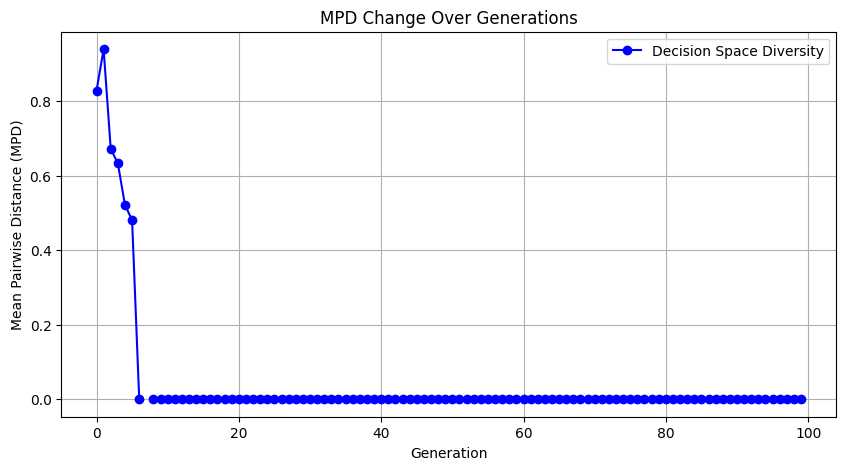

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(GeneticAlgorithmConfig.mpd_objective)), GeneticAlgorithmConfig.mpd_objective, label="Decision Space Diversity", marker='o', linestyle='-', color='b')
plt.xlabel("Generation")
plt.ylabel("Mean Pairwise Distance (MPD)")
plt.title("MPD Change Over Generations")
plt.legend()
plt.grid()
plt.show()

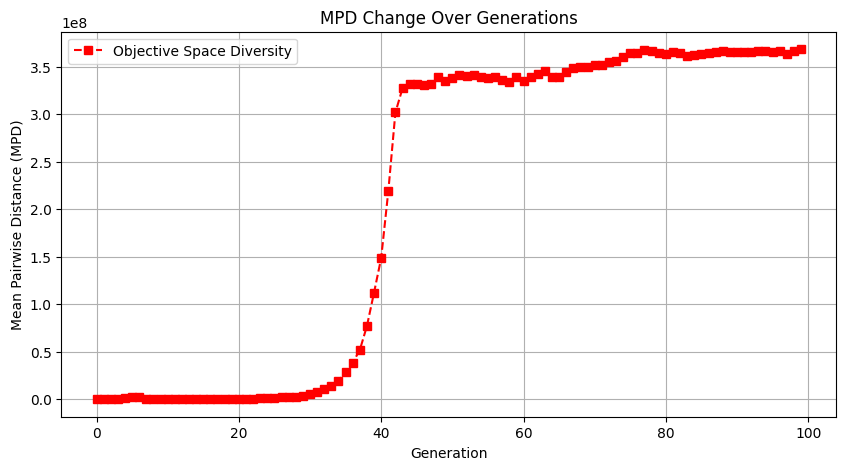

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(GeneticAlgorithmConfig.mpd_decision)), GeneticAlgorithmConfig.mpd_decision, label="Objective Space Diversity", marker='s', linestyle='--', color='r')
plt.xlabel("Generation")
plt.ylabel("Mean Pairwise Distance (MPD)")
plt.title("MPD Change Over Generations")
plt.legend()
plt.grid()
plt.show()

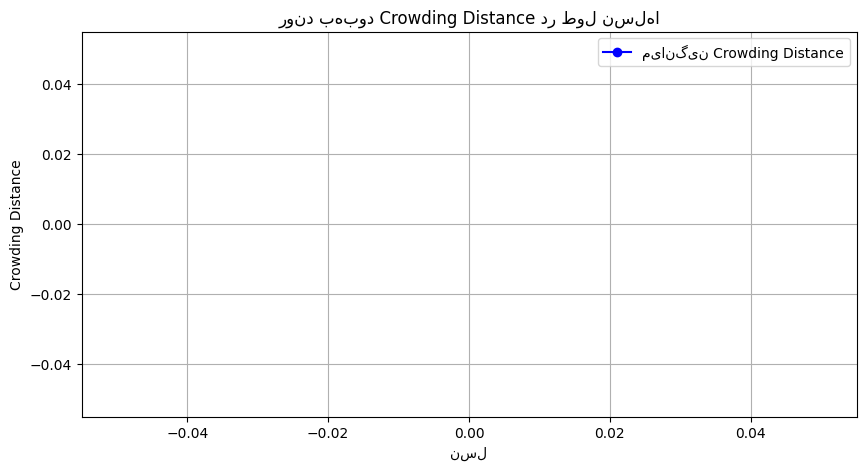

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(GeneticAlgorithmConfig.cd, label="میانگین Crowding Distance", marker="o", color="blue")
plt.xlabel("نسل")
plt.ylabel("Crowding Distance")
plt.title("روند بهبود Crowding Distance در طول نسل‌ها")
plt.legend()
plt.grid()
plt.show()

In [31]:
mean_cd = [np.mean(cd[np.isfinite(cd)]) for cd in GeneticAlgorithmConfig.cd_all]
max_cd = [np.max(cd[np.isfinite(cd)]) for cd in GeneticAlgorithmConfig.cd_all]

plt.figure(figsize=(10, 5))
plt.plot(range(len(mean_cd)), mean_cd, label="میانگین Crowding Distance", marker="o", color="blue")
plt.plot(range(len(max_cd)), max_cd, label="بیشینه Crowding Distance", marker="s", color="red", linestyle="dashed")
plt.xlabel("نسل")
plt.ylabel("Crowding Distance")
plt.title("روند بهبود Crowding Distance در طول نسل‌ها")
plt.legend()
plt.grid()
plt.show()

AttributeError: type object 'GeneticAlgorithmConfig' has no attribute 'cd_all'

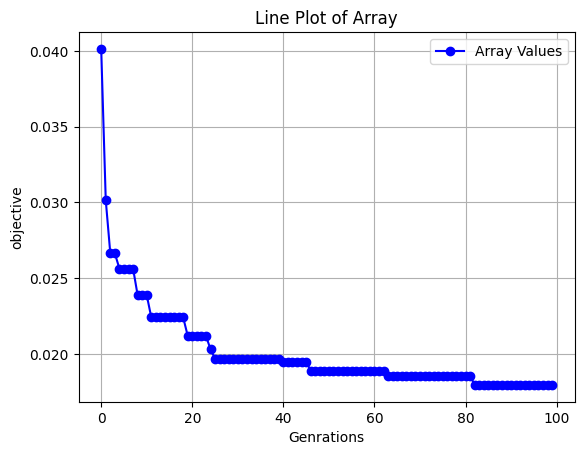

In [32]:
plt.plot(range(len(GeneticAlgorithmConfig.best)), GeneticAlgorithmConfig.best, marker='o', linestyle='-', color='b', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("Line Plot of Array")
plt.legend()
plt.grid(True)
plt.show()

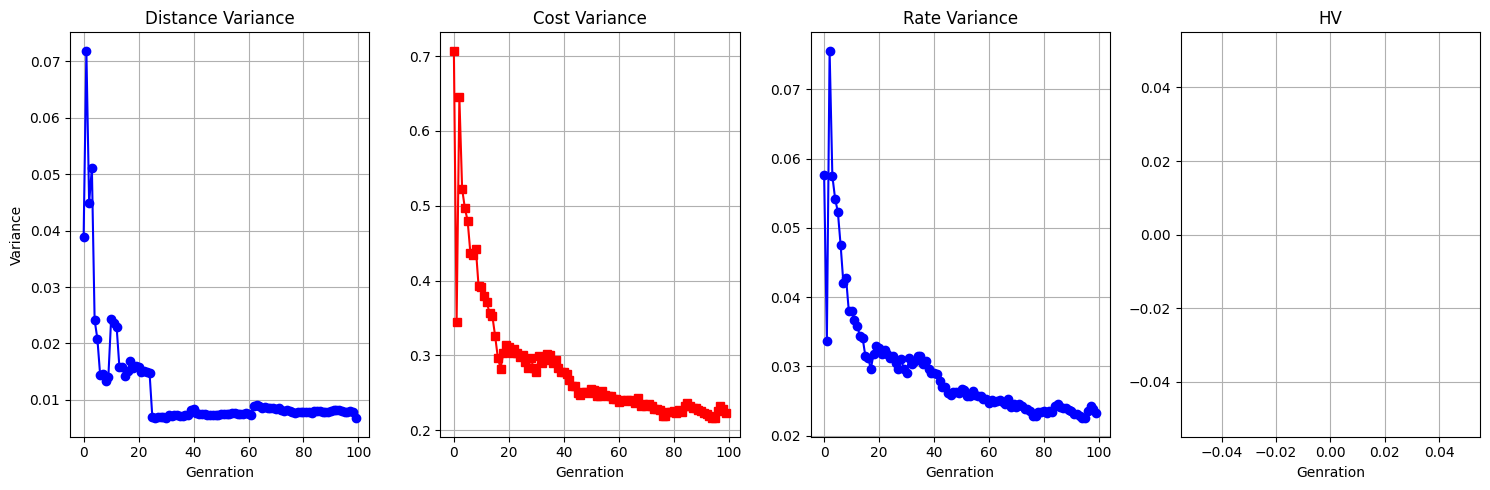

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# رسم نمودار واریانس

fig, axes = plt.subplots(1, 4, figsize=(15, 5))


axes[0].plot(GeneticAlgorithmConfig.distance_variance, 'b-o', label='Distance Variance')
axes[0].set_title("Distance Variance")
axes[0].set_xlabel("Genration")
axes[0].set_ylabel("Variance")
axes[0].grid(True)

# نمودار واریانس هزینه
axes[1].plot(GeneticAlgorithmConfig.cost_variance, 'r-s', label='Cost Variance')
axes[1].set_title("Cost Variance")
axes[1].set_xlabel("Genration")
axes[1].grid(True)

# نمودار واریانس نرخ
axes[2].plot(range(len(GeneticAlgorithmConfig.rate_variance)), GeneticAlgorithmConfig.rate_variance, 'b-o', label='Rate Variance')
axes[2].set_title("Rate Variance")
axes[2].set_xlabel("Genration")
axes[2].grid(True)


axes[3].plot(GeneticAlgorithmConfig.HV, 'b-o', label='HV')
axes[3].set_title("HV")
axes[3].set_xlabel("Genration")
axes[3].grid(True)

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()

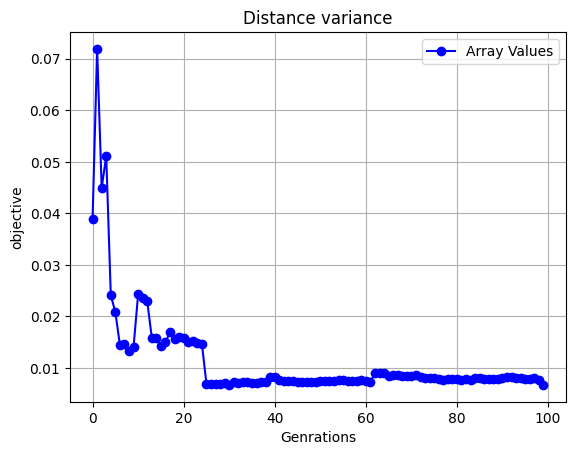

In [34]:
plt.plot(GeneticAlgorithmConfig.distance_variance, marker='o', linestyle='-', color='b', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("Distance variance")
plt.legend()
plt.grid(True)
plt.show()

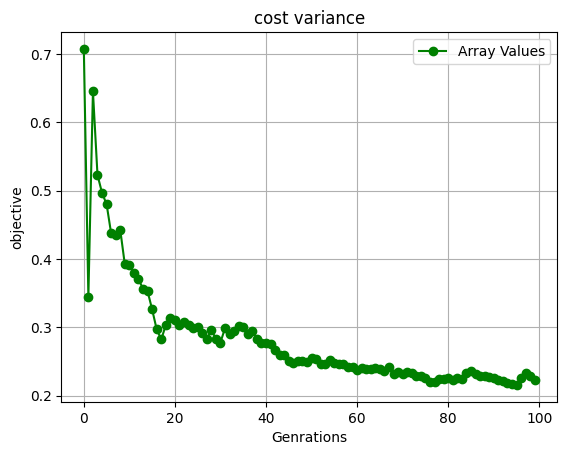

In [35]:
plt.plot(GeneticAlgorithmConfig.cost_variance, marker='o', linestyle='-', color='g', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("cost variance")
plt.legend()
plt.grid(True)
plt.show()

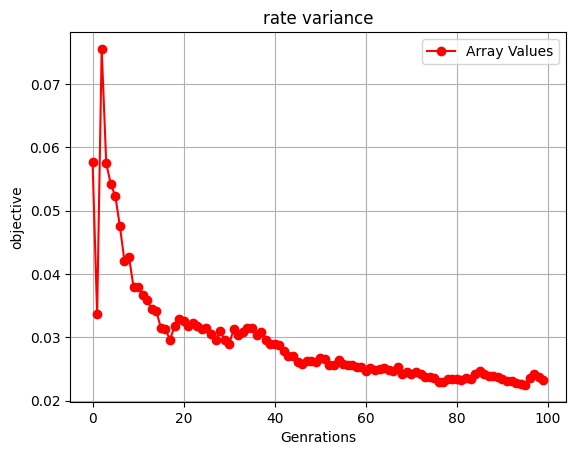

In [36]:
plt.plot(GeneticAlgorithmConfig.rate_variance, marker='o', linestyle='-', color='r', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("rate variance")
plt.legend()
plt.grid(True)
plt.show()

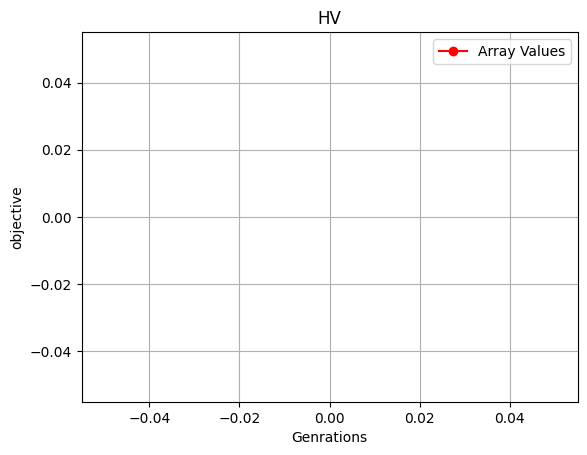

In [37]:
plt.plot(GeneticAlgorithmConfig.HV, marker='o', linestyle='-', color='r', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("HV")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
len(res.F)

109

In [ ]:
import folium

# ایجاد یک نقشه در مرکز اولین مکان
map_center = [locations["Longitude"].mean(), locations["Latitude"].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

index = 0
pareto_solutions = res.X
startRoute = GeneticAlgorithmConfig.totalLocationSize
endRoute  = (pareto_solutions[0][index][0] * GeneticAlgorithmConfig.timePlaceMappingSize) + GeneticAlgorithmConfig.totalLocationSize + (GeneticAlgorithmConfig.hotelSize * 2)
for j in range(startRoute,
                endRoute,
                GeneticAlgorithmConfig.timePlaceMappingSize):
  node = locations[locations["Id"] == pareto_solutions[0][index][j]]
  color = 'blue'

  folium.Marker(
      location=[node["Longitude"].values[0], node["Latitude"].values[0]],
      popup=node["tag"].values[0],
      tooltip=f"{node['name'].values[0]}",
      icon=folium.Icon(color=color)
  ).add_to(mymap)


mymap




IndexError: invalid index to scalar variable.